# *NATURAL LANGUAGE PROCESSING CAPSTONE PROJECT AIML* 

# **CHATBOT INTERFACE**

• **DOMAIN:** Industrial safety. NLP based Chatbot.

• **CONTEXT:**
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

• **DATA DESCRIPTION:**
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

**Columns description:**

    ‣ Data: timestamp or time/date information
    ‣ Countries: which country the accident occurred (anonymised)
    ‣ Local: the city where the manufacturing plant is located (anonymised)
    ‣ Industry sector: which sector the plant belongs to
    ‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
    ‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
    involved in the accident)
    ‣ Genre: if the person is male of female
    ‣ Employee or Third Party: if the injured person is an employee or a third party
    ‣ Critical Risk: some description of the risk involved in the accident
    ‣ Description: Detailed description of how the accident happened.



**• PROJECT OBJECTIVE:**
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

1. Milestone 1: [ Duration: 2 weeks, Score: 20 points]

            ‣ Input: Interim report
            ‣ Process: [ 15 points ]
            ‣ Step 1: Import the data
            ‣ Step 2: Data cleansing
            ‣ Step 3: Data preprocessing
            ‣ Step 4: Data preparation to be used for AIML model learning
            ‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning [ 2.5 points ]
            ‣ Submission: Interim report 1 [ 2.5 points ]

2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]
            ‣ Input: Output of milestone 1
            ‣ Process: [ 15 points ]
            ‣ Step 1: NLP pre processing
            ‣ Step 2: Design, train and test machine learning classifiers
            ‣ Step 3: Design, train and test Neural networks classifiers
            ‣ Step 4: Design, train and test RNN or LSTM classifiers
            ‣ Step 5: Choose the best performing model classifier and pickle it.
            ‣ Output: Pickled model to be used for future prediction [ 2.5 points ]
            ‣ Submission: Interim report 2 [ 2.5 points ]

3. Milestone 3: [ Duration: 2 weeks, Score: 20 points]
            ‣ Input: Pickled model from milestone 2
            ‣ Process:
            ‣ Step 1: Design a clickable UI which can automate tasks performed under milestone 1 [ 5 points ]
            ‣ Step 2: Design a clickable UI which can automate tasks performed under milestone 2 [ 5 points ]
           ‣ Step 3: Design a clickable UI based chatbot interface [ 5 points ]
           ‣ Output: Clickable UI based chatbot interface which accepts text as input and replies back with relevant answers.
           ‣ Submission: Final report [ 5 points ]

In [1]:
!pip install --upgrade gensim
!pip install textaugment
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 42 kB 428 kB/s 
     |████████████████████████████████| 1.4 MB 33.3 MB/s 
     |████████████████████████████████| 65 kB 3.8 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=1ed5b36325e46654f740952cf459fe7252f6029872cbd299d49cf8ca8999bb97
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans
Looking in i

In [2]:
import gensim
print(gensim.__version__)

4.2.0


**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import nltk, re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter


import tensorflow as tf
from tensorflow.keras import preprocessing
tf.random.set_seed(4)
tf.__version__

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score, precision_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

#Importing model building libraries 
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Bidirectional

import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import holoviews as hv
from holoviews import opts

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### **MileStone 1 : Step 1** : Importing the data

---



In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
path_name =  "/content/drive/MyDrive/aiml/FinalProject"
for dirname, _, filenames in os.walk(path_name):
    for filename in filenames:
        print(os.path.join(dirname, filename))
filename ="IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv"
data = pd.read_csv(os.path.join(path_name, filename))

/content/drive/MyDrive/aiml/FinalProject/IHMStefanini_industrial_safety_and_health_database.csv
/content/drive/MyDrive/aiml/FinalProject/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv
/content/drive/MyDrive/aiml/FinalProject/glove.6B.200d.txt


In [6]:
data.head(5)

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [7]:
shape_of_data = data.shape
print("No of rows : " + str(shape_of_data[0]) +"\n")
print("No of columns : " + str(shape_of_data[1]) +"\n")

No of rows : 425

No of columns : 11



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


We noticed that except a 'date' column all other columns are categorical columns.

### **MileStone 1 : Step 2** : Data cleansing

> **Let us remove the Unnamed: 0**

In [9]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head(1)

Data   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   

  Potential Accident Level Genre Employee or Third Party Critical Risk  \
0                       IV  Male             Third Party       Pressed   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...

> **Let us rename columns - Data to Date, Countries to Country, Genre to Gender, Employee or Third Party to Employee type**

In [10]:
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

data.head(2)

Date     Country     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender Employee type        Critical Risk  \
0                       IV   Male   Third Party              Pressed   
1                       IV   Male      Employee  Pressurized Systems   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...

We see that now the columns are correctly labelled.

> **Lets check for duplicates and drop the duplicates**

In [11]:
data.duplicated().sum()

7

In [12]:
duplicates = data.duplicated()

data[duplicates]

Date     Country     Local Industry Sector Accident Level  \
77   2016-04-01 00:00:00  Country_01  Local_01          Mining              I   
262  2016-12-01 00:00:00  Country_01  Local_03          Mining              I   
303  2017-01-21 00:00:00  Country_02  Local_02          Mining              I   
345  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
346  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
355  2017-03-15 00:00:00  Country_03  Local_10          Others              I   
397  2017-05-23 00:00:00  Country_01  Local_04          Mining              I   

    Potential Accident Level Gender         Employee type  \
77                         V   Male  Third Party (Remote)   
262                       IV   Male              Employee   
303                        I   Male  Third Party (Remote)   
345                        I   Male           Third Party   
346                        I   Male           Third Party   
355                        I   Male           Third Party   
397                       IV   Male           Third Party   

               Critical Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

In [13]:
data.drop_duplicates(inplace=True)
data.shape


(418, 10)

> **Let's check the unique and frequency(mode) of each variable.**

In [14]:
for x in data.columns:
    if x != 'Description':
      print('--'*30); print(f'Unique values of "{x}" column'); print('--'*30)
      print(data[x].unique())
      print('\n')

------------------------------------------------------------
Unique values of "Date" column
------------------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00

    We observed that there are records of accidents from 1st Jan 2016 to 9th July 2017 in every month. So there are no outliers in the 'Date' column.

    There are only three country types so there are no outliers in 'Country' column.

    There are 12 Local cities where manufacturing plant is located and it's types are in sequence so there are no outliers in 'Local' column.

    There are only three Industry Sector types which are in sequence so there are no outliers in 'Industry Sector' column.

    There are only five Accident Level types which are in sequence so there are no outliers in 'Accident Level' column.

    There are only six Potential Accident Level types which are in sequence so there are no outliers in 'Potential Accident Level' column.

    There are only two Gender types in the provided data so there are no outliers in 'Gender' column.

    There are only three Employee types in the provided data so there are no outliers in 'Gender' column.

    There are quite a lot of Critical risk descriptions and we don't see any outliers but with the help of SME we can decide whether this column has outliers or not.

**Let us check for missing values**

In [15]:
data.isnull().sum()


Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

### **MileStone 1 : Step 3** : Data Pre-processing

In [16]:
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data.Date.apply(lambda x : x.year)
data['Month'] = data.Date.apply(lambda x : x.month)
data['Day'] = data.Date.apply(lambda x : x.day)
data['Weekday'] = data.Date.apply(lambda x : x.day_name())
data['WeekofYear'] = data.Date.apply(lambda x : x.weekofyear)

data.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  
0     Friday          53  
1   Saturday          53  
2  Wednesday           1  
3     Friday           1  
4     Sunday           1

**We can create seasonal variable based on month variable.**

Spring : September to November

Summer : December to February

Autumn : March to May

Winter : June to August

In [17]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season


In [18]:
data['Season'] = data['Month'].apply(month2seasons)
data.head(3)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     Weekday  WeekofYear  Season  
0     Friday          53  Summer  
1   Saturday          53  Summer  
2  Wednesday           1  Summer

**We can create holidays variable based on Brazil holidays list from 2016 and 2017.**

Another national holidays are election days. There are a plenty of unofficial ethnic and religious holidays in Brazil. Octoberfest, Brazilian Carnival, Kinderfest, Fenaostra, Fenachopp, Musikfest, Schutzenfest, Kegelfest, Cavalhadas, Oberlandfest, Tirolerfest, Marejada are among them.

Note: Considering official holidays only.

In [19]:
import holidays

brazil_holidays = []

print('--'*40); print('List of Brazil holidays in 2016'); print('--'*40)
for date in holidays.Brazil(years = 2016).items():
    brazil_holidays.append(str(date[0]))
    print(date)

print('--'*40); print('List of Brazil holidays in 2017'); print('--'*40)
for date in holidays.Brazil(years = 2017).items():
    brazil_holidays.append(str(date[0]))
    print(date)

--------------------------------------------------------------------------------
List of Brazil holidays in 2016
--------------------------------------------------------------------------------
(datetime.date(2016, 1, 1), 'Ano novo')
(datetime.date(2016, 4, 21), 'Tiradentes')
(datetime.date(2016, 5, 1), 'Dia Mundial do Trabalho')
(datetime.date(2016, 9, 7), 'Independência do Brasil')
(datetime.date(2016, 10, 12), 'Nossa Senhora Aparecida')
(datetime.date(2016, 11, 2), 'Finados')
(datetime.date(2016, 11, 15), 'Proclamação da República')
(datetime.date(2016, 12, 25), 'Natal')
(datetime.date(2016, 3, 25), 'Sexta-feira Santa')
(datetime.date(2016, 3, 27), 'Páscoa')
(datetime.date(2016, 5, 26), 'Corpus Christi')
(datetime.date(2016, 2, 10), 'Quarta-feira de cinzas (Início da Quaresma)')
(datetime.date(2016, 2, 9), 'Carnaval')
--------------------------------------------------------------------------------
List of Brazil holidays in 2017
------------------------------------------------------

In [20]:
data['Is_Holiday'] = [1 if str(val).split()[0] in brazil_holidays else 0 for val in data['Date']]
data.head(3)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     Weekday  WeekofYear  Season  Is_Holiday  
0     Friday          53  Summer           1  
1   Saturday          53  Summer           0  
2  Wednesday           1  Summer           0

### **MileStone 1 : Step 4** Data preparation to be used for AIML model learning

Here 
Target variable/dependent variable: 'Accident Level', 'Potential Accident Level'

Independent variables (Input varibles): 'Date', 'Country', 'Local', 'Industry Sector', 'Gender', 'Employee type', 'Critical Risk', 'Description'

# Univariate Data Analysis


In [21]:
def countplot_data(data, param):
  sns.set(style="whitegrid")
  plt.figure(figsize=(8,5))
  total = float(len(data))
  ax = sns.countplot(x=param, data=data)
  plt.title('Data provided for each event', fontsize=20)
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='center')
  plt.show()

**Local**

In [22]:
data['Local'].value_counts()

Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
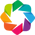

:Bars   [index]   (Local)

In [23]:
local_cnt = np.round(data['Local'].value_counts(normalize=True) * 100)

hv.extension('bokeh')
hv.Bars(local_cnt).opts(title="Local Count", color="#8888ff", xlabel="Locals", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=700, height=300,tools=['hover'],show_grid=True))

**Country**

------------------------------------------------------------
Value Counts for `Country` label
------------------------------------------------------------
Country_01 count: 248 i.e. 59.0%
Country_02 count: 129 i.e. 31.0%
Country_03 count: 41 i.e. 10.0%
------------------------------------------------------------
Distributon of `Country` label
------------------------------------------------------------


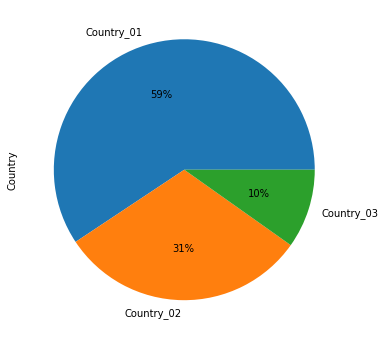

In [24]:
print('--'*30); print('Value Counts for `Country` label'); print('--'*30)

total_row_cnt = data.shape[0]
country_01_cnt = data[data.Country == 'Country_01'].shape[0]
country_02_cnt = data[data.Country == 'Country_02'].shape[0]
country_03_cnt = data[data.Country == 'Country_03'].shape[0]

print(f'Country_01 count: {country_01_cnt} i.e. {round(country_01_cnt/total_row_cnt*100, 0)}%')
print(f'Country_02 count: {country_02_cnt} i.e. {round(country_02_cnt/total_row_cnt*100, 0)}%')
print(f'Country_03 count: {country_03_cnt} i.e. {round(country_03_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Country` label'); print('--'*30)
_ = data['Country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (10, 6))

Here we can see that 
> 59% accidents occurred in Country_01

> 31% accidents occurred in Country_02

> 10% accidents occurred in Country_03

**Industry Sector**

------------------------------------------------------------
Value Counts for `Industry Sector` label
------------------------------------------------------------
Mining count: 237 i.e. 57.0%
Metals count: 134 i.e. 32.0%
Others count: 47 i.e. 11.0%


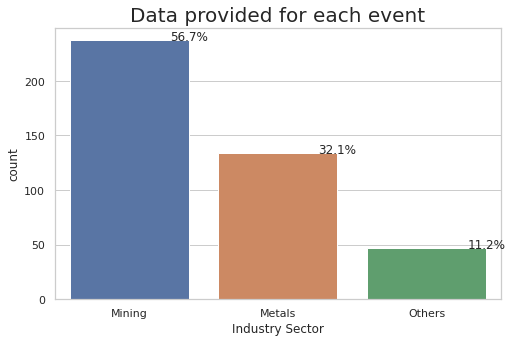

In [25]:
print('--'*30); print('Value Counts for `Industry Sector` label'); print('--'*30)

Mining_cnt = data[data['Industry Sector'] == 'Mining'].shape[0]
Metals_cnt = data[data['Industry Sector'] == 'Metals'].shape[0]
Others_cnt = data[data['Industry Sector'] == 'Others'].shape[0]

print(f'Mining count: {Mining_cnt} i.e. {round(Mining_cnt/total_row_cnt*100, 0)}%')
print(f'Metals count: {Metals_cnt} i.e. {round(Metals_cnt/total_row_cnt*100, 0)}%')
print(f'Others count: {Others_cnt} i.e. {round(Others_cnt/total_row_cnt*100, 0)}%')
countplot_data(data,'Industry Sector')

* The number of accidents decreases as the Accident Level increases.
* The number of accidents increases as the Potential Accident Level increases.

**Gender**

------------------------------------------------------------
Value Counts for `Gender` label
------------------------------------------------------------
Male count: 396 i.e. 95.0%
Female count: 22 i.e. 5.0%


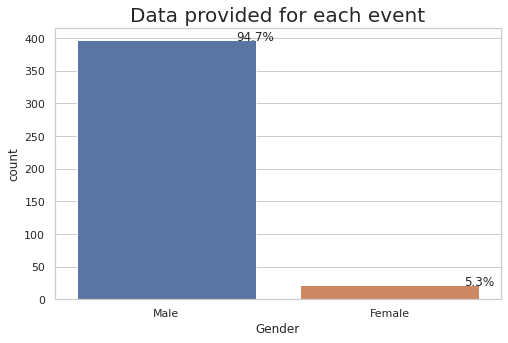

In [26]:
print('--'*30); print('Value Counts for `Gender` label'); print('--'*30)

Male_cnt = data[data['Gender'] == 'Male'].shape[0]
Female_cnt = data[data['Gender'] == 'Female'].shape[0]

print(f'Male count: {Male_cnt} i.e. {round(Male_cnt/total_row_cnt*100, 0)}%')
print(f'Female count: {Female_cnt} i.e. {round(Female_cnt/total_row_cnt*100, 0)}%')

countplot_data(data,'Gender')

* There are more men working in this industry as compared to women.

**Accident Level**

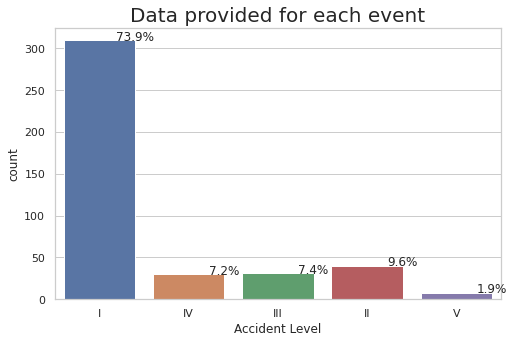

In [27]:
countplot_data(data,'Accident Level')

*   The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.




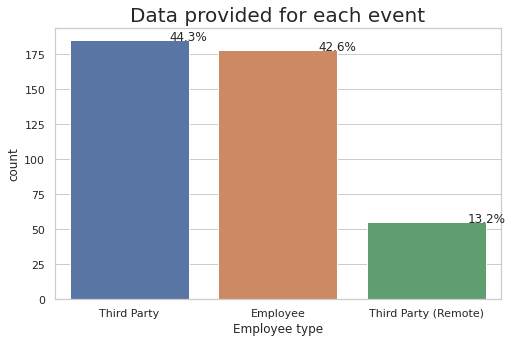

In [28]:
countplot_data(data,'Employee type')

In [29]:
Pot_Acc_level = data['Potential Accident Level'].value_counts()
Pot_Acc_level

IV     141
III    106
II      95
I       45
V       30
VI       1
Name: Potential Accident Level, dtype: int64

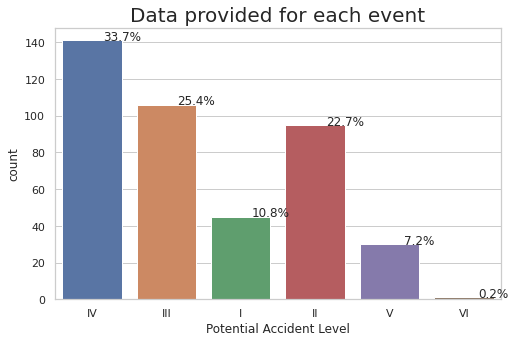

In [30]:
countplot_data(data,'Potential Accident Level')

**Number of accidents happening on particular weekdays**

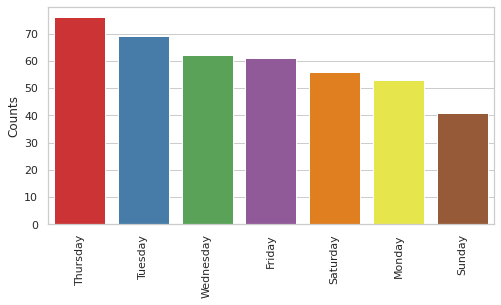

In [31]:
plt.figure(figsize=(8,4))
Weekday = data['Weekday'].value_counts()
sns.barplot(y = Weekday , x = Weekday.index, palette="Set1")
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

**Critical Risk in various kind of enviroments**

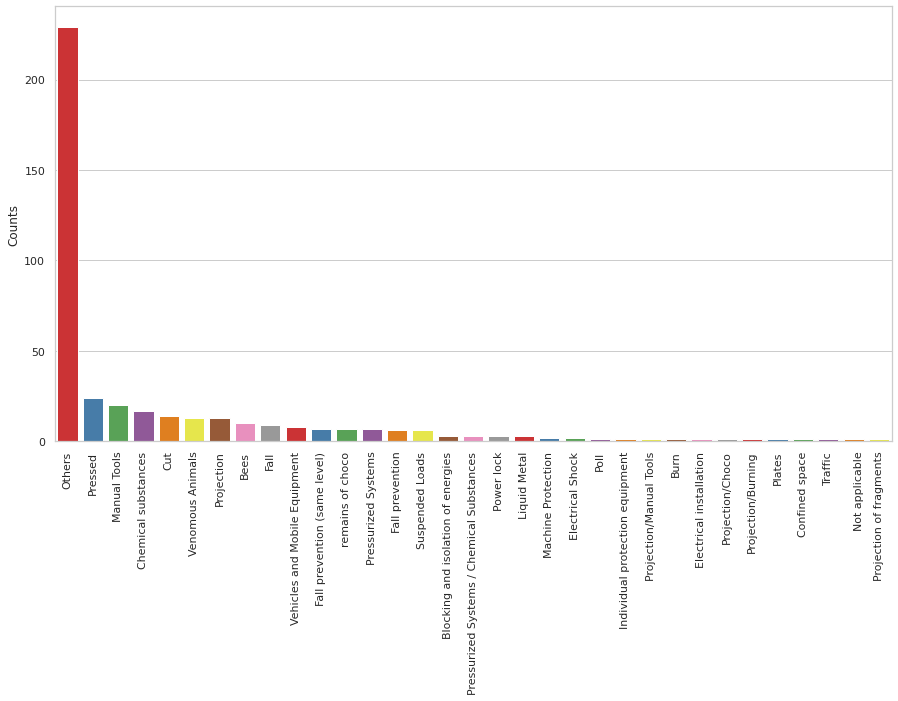

In [32]:
plt.figure(figsize=(15,8))
CritRisk = data['Critical Risk'].value_counts() 
sns.barplot(y = CritRisk , x = CritRisk.index, palette="Set1")
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

# Multivariate Data Analysis

**Comparison between Accident Level & Potential Accident Level**

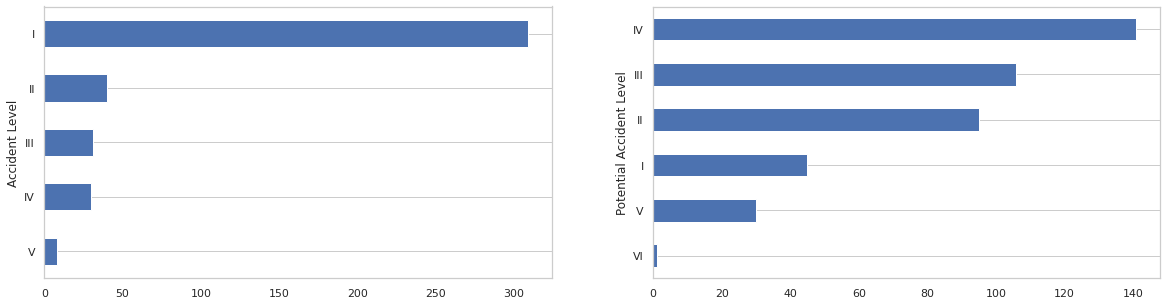

In [33]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
data[acc_level].reset_index().groupby(acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[0]).grid(axis='x')

pot_acc_level = "Potential Accident Level"
data[pot_acc_level].reset_index().groupby(pot_acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[1]).grid(axis='x')


plt.show()

**Countries - Accident Percentage**

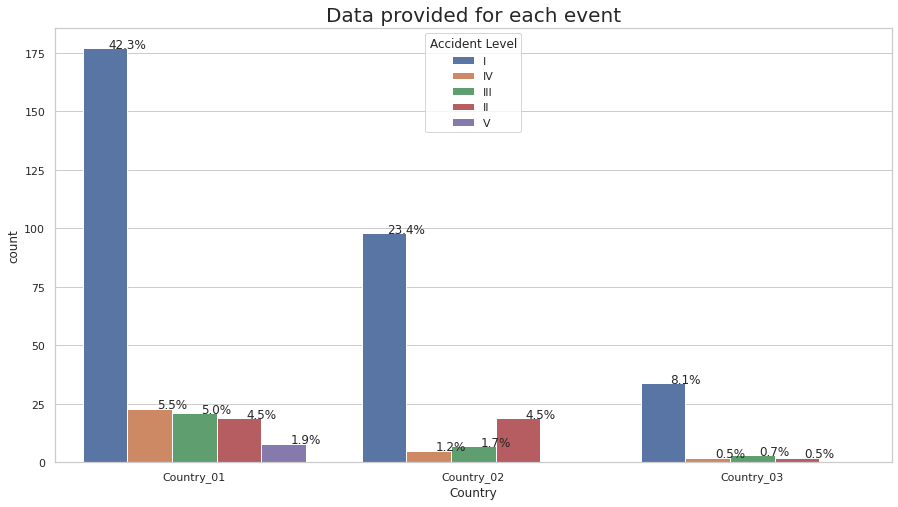

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
total = float(len(data))
ax = sns.countplot(x="Country", hue=acc_level, data=data)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Sectors - Accident Percentage**

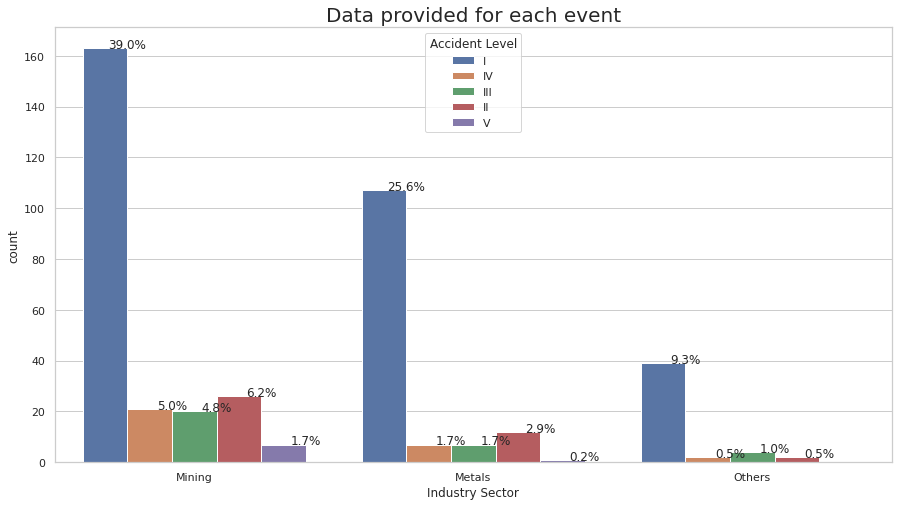

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
total = float(len(data))
ax = sns.countplot(x="Industry Sector", hue=acc_level, data=data)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Workforce - Accident Percentage**

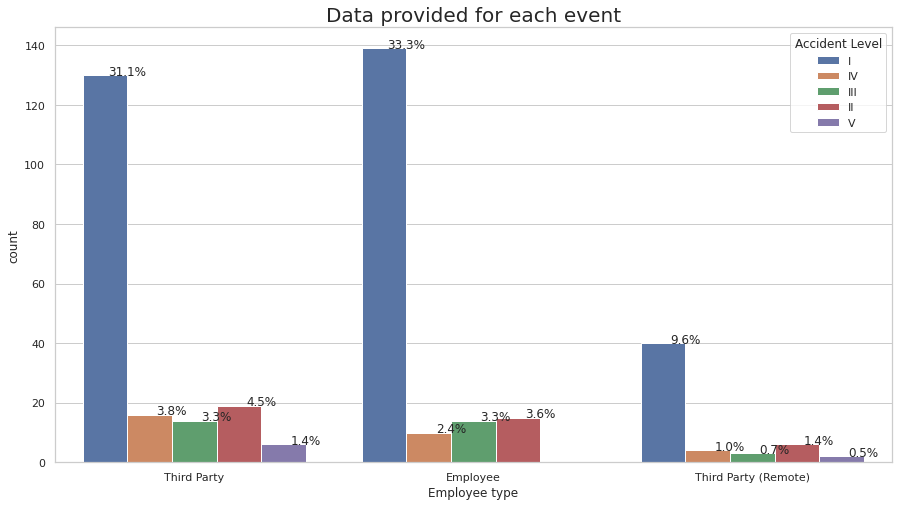

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
total = float(len(data))
ax = sns.countplot(x="Employee type", hue=acc_level, data=data)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

* 44% Third party empoyees working in this industry.
* 43% own empoyees working in this industry.
* 13% Third party(Remote) empoyees working in this industry.

**Bivariate Analysis and Hypothesis testing**

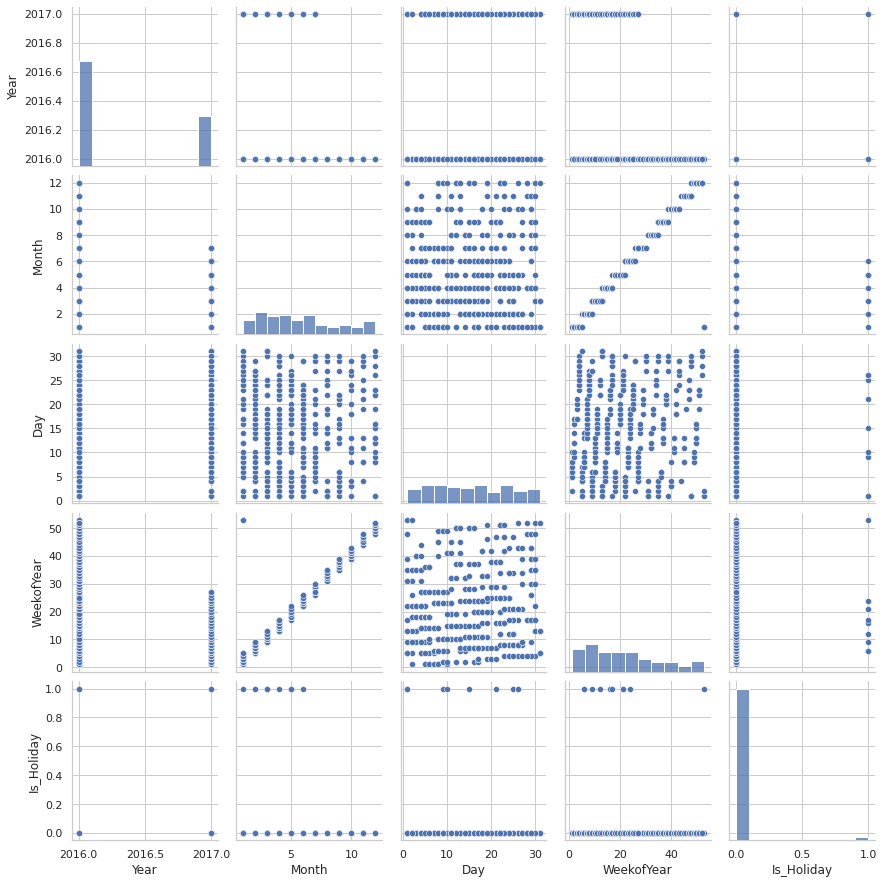

In [37]:
sns.pairplot(data)
plt.show()

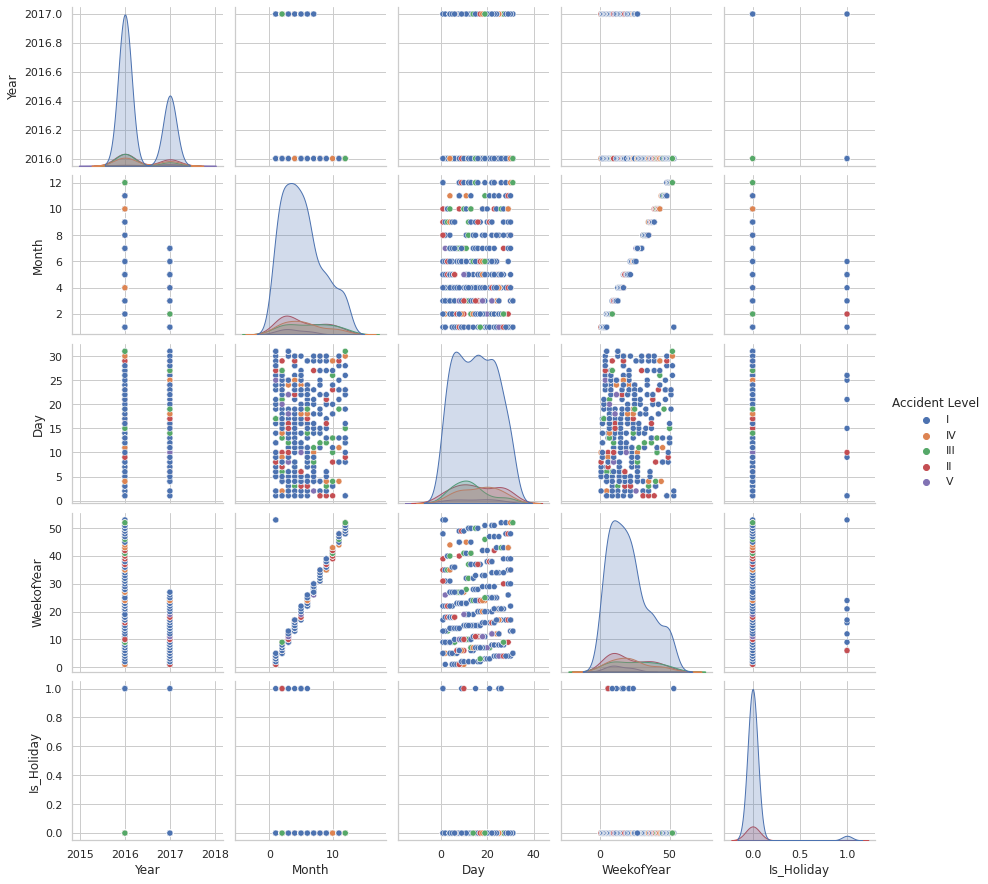

In [38]:
sns.pairplot(data, hue ='Accident Level')
plt.show()

##### a. Industry Sector by Countries - Is the distribution of industry sector different significantly in differ countries or not?

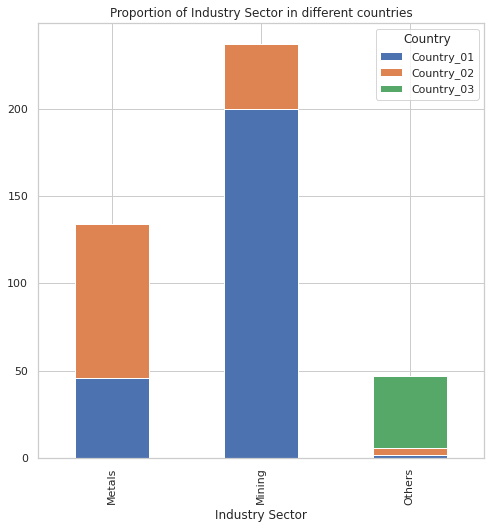

In [39]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = data['Industry Sector'], columns = data['Country'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector in different countries")
plt.show()

**Observations**

* Metals and Mining industry sector plants are not available in Country_03.
* Distribution of industry sector differ significantly in each country. But let's check the proportion of metals, mining and others sector in Country_01 and is that difference is statistically significant?

###### 1. State the H0 and Ha

###### Ho = The proportions of industry sector is not differ in different countries
###### Ha = The proportions of industry sector is differ in different countries

###### 2. Decide the significance level: alpha = 0.05

###### 3. Identify the test-statistic: Z-test of proportions

###### 4. Calculate the p_value using test-statistic

In [40]:
mining_country1 = data[data['Industry Sector'] == 'Mining']['Country'].value_counts()[0]
mining_country2 = data[data['Industry Sector'] == 'Mining']['Country'].value_counts()[1]

metals_country1 = data[data['Industry Sector'] == 'Metals']['Country'].value_counts()[1]
metals_country2 = data[data['Industry Sector'] == 'Metals']['Country'].value_counts()[0]

others_country1 = data[data['Industry Sector'] == 'Others']['Country'].value_counts()[2]
others_country2 = data[data['Industry Sector'] == 'Others']['Country'].value_counts()[1]
others_country3 = data[data['Industry Sector'] == 'Others']['Country'].value_counts()[0]

print([mining_country1, metals_country1, others_country1], [country_01_cnt])
print(f'Proportions of mining, metals, others in country_01 = {round(200/248,2)}%, {round(46/248,2)}%, {round(2/248,2)}% respectively')

[200, 46, 2] [248]
Proportions of mining, metals, others in country_01 = 0.81%, 0.19%, 0.01% respectively


In [41]:
from statsmodels.stats.proportion import proportions_ztest

# Z-test proportions: More than 2 samples not implemented yet, hence I am passing two elements
t_statistic, p_value = proportions_ztest([mining_country1, metals_country1], [country_01_cnt])

print("Mining and Metals t_statistic", t_statistic)
print("Mining and Metals p_value", p_value)

t_statistic, p_value = proportions_ztest([mining_country1, others_country1], [country_01_cnt])

print("Mining and Others t_statistic", t_statistic)
print("Mining and Others p_value", p_value)

Mining and Metals t_statistic 13.830057992106923
Mining and Metals p_value 1.6788511371823555e-43
Mining and Others t_statistic 18.094920466702863
Mining and Others p_value 3.494480338628687e-73


###### 5. Decide to Reject or Accept Null Hypothesis

In [42]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True


* Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from metals sector)

* Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from others sector)

##### b. Employee type by Gender - Is the distribution of employee type differ significantly in different genders?

In [43]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = data.groupby(['Gender','Employee type'])['Employee type'].count().unstack().apply(f, axis=1)

hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Employee type'], 'value').opts(opts.Bars(title="Employee type by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Bars   [Gender,Employee type]   (value)

**Observations**

* Proportion of third party employees in each gender is equal.
* Proportion of third party(remote) employees in each gender is not equal.
* Proportion of own employees in each gender is not equal. But let's check is that difference is statistically significant?

###### 1. State the H0 and Ha

###### Ho = The proportions of own employees in each gender is equal.
###### Ha = The proportions of own employees in each gender is not equal.

###### 2. Decide the significance level: alpha = 0.05

###### 3. Identify the test-statistic: Z-test of proportions

###### 4. Calculate the p_value using test-statistic

In [44]:
male_emp = data[data['Employee type'] == 'Employee'].Gender.value_counts()[0]
female_emp = data[data['Employee type'] == 'Employee'].Gender.value_counts()[1]

print([male_emp, female_emp], [Male_cnt, Female_cnt])
print(f'Proportion of own employee types in male, female = {round(170/396,2)}%, {round(8/22,2)}% respectively')

[170, 8] [396, 22]
Proportion of own employee types in male, female = 0.43%, 0.36% respectively


In [45]:
t_statistic, p_value = proportions_ztest([male_emp, female_emp], [Male_cnt, Female_cnt])

print("t_statistic", t_statistic)
print("p_value", p_value)

t_statistic 0.6061911815982839
p_value 0.5443878078917722


###### 5. Decide to Reject or Accept Null Hypothesis

In [46]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


Hence we fail to reject Null Hypothesis, we have enough (95%) evidence to prove that, the proportion of own employees in each gender is equal.

##### c. Industry Sector by Gender - Is the distribution of industry sector differ significantly in different genders?

In [47]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = data.groupby(['Gender','Industry Sector'])['Industry Sector'].count().unstack().apply(f, axis=1)

em_gen

Industry Sector  Metals  Mining  Others
Gender                                 
Female             59.0    23.0    18.0
Male               31.0    59.0    11.0

**Observations**

* Proportion of Metals sector employees in each gender is not equal.
* Proportion of Mining sector employees in each gender is not equal.
* Proportion of Others sector employees in each gender is not equal.

##### d. Accident Levels by Gender - Is the distribution of accident levels and potential accident levels differ significantly in different genders?

In [48]:
f = lambda x : np.round(x/x.sum() * 100)

ac_gen = data.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)

display(ac_gen)
pot_ac_gen = data.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
display(pot_ac_gen)


Accident Level     I    II  III   IV    V
Gender                                   
Female          82.0  14.0  5.0  NaN  NaN
Male            73.0   9.0  8.0  8.0  2.0

Potential Accident Level     I    II   III    IV    V   VI
Gender                                                    
Female                     NaN  64.0  14.0  18.0  5.0  NaN
Male                      11.0  20.0  26.0  35.0  7.0  0.0

**Observations**

* Proportion of accident levels in each gender is not equal and males have a higher accident levels than females.
* There are many low risks at general accident level, but many high risks at potential accident level.

##### e. Accident Levels by Employee type - Is the distribution of accident levels and potential accident levels differ significantly in different employee types?

In [49]:
f = lambda x : np.round(x/x.sum() * 100)

ac_em = data.groupby(['Employee type','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
display(ac_em)
pot_ac_em = data.groupby(['Employee type','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
display(pot_ac_em)


Accident Level           I    II  III   IV    V
Employee type                                  
Employee              78.0   8.0  8.0  6.0  NaN
Third Party           70.0  10.0  8.0  9.0  3.0
Third Party (Remote)  73.0  11.0  5.0  7.0  4.0

Potential Accident Level     I    II   III    IV    V   VI
Employee type                                             
Employee                   7.0  25.0  30.0  33.0  6.0  NaN
Third Party               16.0  20.0  19.0  37.0  8.0  1.0
Third Party (Remote)       7.0  25.0  33.0  27.0  7.0  NaN

**Observations**

* For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be slightly higher at high accident levels.

##### f. Accident Levels by Month - Is the distribution of accident levels and potential accident levels differ significantly in different months?

In [50]:
f = lambda x : np.round(x/x.sum() * 100)

ac_mo = data.groupby(['Month','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
display(ac_mo)

pot_ac_mo = data.groupby(['Month','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
display(pot_ac_mo)

Accident Level     I    II   III    IV    V
Month                                      
1               82.0   5.0   5.0   5.0  3.0
2               69.0  15.0   7.0   8.0  2.0
3               68.0  14.0   6.0   6.0  6.0
4               84.0   4.0   6.0   6.0  0.0
5               78.0   8.0   2.0  10.0  2.0
6               80.0   6.0   4.0   8.0  2.0
7               67.0   4.0  17.0   8.0  4.0
8               71.0  14.0  10.0   5.0  0.0
9               75.0  12.0   8.0   4.0  0.0
10              52.0  19.0  19.0  10.0  0.0
11              69.0   8.0   8.0  15.0  0.0
12              74.0   9.0  13.0   4.0  0.0

Potential Accident Level     I    II   III    IV     V   VI
Month                                                      
1                         10.0   8.0  41.0  38.0   0.0  3.0
2                         10.0  23.0  25.0  31.0  11.0  0.0
3                         12.0  14.0  26.0  32.0  16.0  0.0
4                          8.0  25.0  27.0  29.0  10.0  0.0
5                         18.0  15.0  25.0  32.0  10.0  0.0
6                         22.0  18.0  24.0  33.0   4.0  0.0
7                          0.0  42.0  12.0  38.0   8.0  0.0
8                          5.0  33.0  33.0  29.0   0.0  0.0
9                         17.0  38.0  17.0  29.0   0.0  0.0
10                         0.0  19.0  24.0  57.0   0.0  0.0
11                        15.0  38.0   8.0  31.0   8.0  0.0
12                         0.0  35.0  26.0  35.0   4.0  0.0

**Observations**

* Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

##### g. Accident Levels by Weekday - Is the distribution of accident levels and potential accident levels differ significantly in different weekday?

In [51]:
f = lambda x : np.round(x/x.sum() * 100)

ac_weekday = data.groupby(['Weekday','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in ac_weekday.index]
ac_weekday.sort_values('week_num', inplace=True)
ac_weekday.drop('week_num', axis=1, inplace=True)
display(ac_weekday)

pot_ac_weekday = data.groupby(['Weekday','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=0).fillna(0)
pot_ac_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in pot_ac_weekday.index]
pot_ac_weekday.sort_values('week_num', inplace=True)
pot_ac_weekday.drop('week_num', axis=1, inplace=True)
display(pot_ac_weekday)

Accident Level     I    II   III    IV    V
Weekday                                    
Monday          70.0  13.0  17.0   0.0  0.0
Tuesday         78.0   7.0   3.0  12.0  0.0
Wednesday       74.0  15.0   3.0   2.0  6.0
Thursday        86.0   4.0   3.0   8.0  0.0
Friday          72.0  11.0   7.0  10.0  0.0
Saturday        61.0  12.0  12.0   7.0  7.0
Sunday          71.0   5.0  12.0  12.0  0.0

Potential Accident Level     I    II   III    IV     V     VI
Weekday                                                      
Monday                     7.0  14.0  13.0  16.0   3.0    0.0
Tuesday                   18.0  20.0  15.0  16.0  13.0    0.0
Wednesday                 27.0  11.0  17.0  11.0  17.0  100.0
Thursday                  20.0  22.0  19.0  16.0  13.0    0.0
Friday                    11.0  15.0  12.0  16.0  23.0    0.0
Saturday                  16.0   8.0  12.0  14.0  27.0    0.0
Sunday                     2.0  11.0  11.0  12.0   3.0    0.0

**Observations**

* Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not changed much.

##### h. Accident Levels by Seasons - Is the distribution of accident levels and potential accident levels differ significantly in different seasons?

In [52]:
f = lambda x : np.round(x/x.sum() * 100)
ac_season = data.groupby(['Season','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in ac_season.index]
ac_season.sort_values('season_num', inplace=True)
ac_season.drop('season_num', axis=1, inplace=True)
display(ac_season)

pot_ac_season = data.groupby(['Season','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=0).fillna(0)
pot_ac_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in pot_ac_season.index]
pot_ac_season.sort_values('season_num', inplace=True)
pot_ac_season.drop('season_num', axis=1, inplace=True)
display(pot_ac_season)

Accident Level     I    II   III   IV    V
Season                                    
Spring          66.0  14.0  12.0  9.0  0.0
Summer          74.0  11.0   7.0  7.0  2.0
Autumn          77.0   9.0   5.0  7.0  3.0
Winter          75.0   7.0   8.0  7.0  2.0

Potential Accident Level     I    II   III    IV     V     VI
Season                                                       
Spring                    13.0  19.0   9.0  16.0   3.0    0.0
Summer                    22.0  26.0  35.0  30.0  27.0  100.0
Autumn                    38.0  27.0  35.0  31.0  57.0    0.0
Winter                    27.0  27.0  21.0  23.0  13.0    0.0

**Observations**

* Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not change much, and some of these levels increased slightly in the second half of the year.

#### Summary Statistics

In [53]:
data.drop(columns='Description').describe(exclude=[np.number]).T

count unique                  top freq      first  \
Date                       418    287  2017-02-08 00:00:00    6 2016-01-01   
Country                    418      3           Country_01  248        NaT   
Local                      418     12             Local_03   89        NaT   
Industry Sector            418      3               Mining  237        NaT   
Accident Level             418      5                    I  309        NaT   
Potential Accident Level   418      6                   IV  141        NaT   
Gender                     418      2                 Male  396        NaT   
Employee type              418      3          Third Party  185        NaT   
Critical Risk              418     33               Others  229        NaT   
Weekday                    418      7             Thursday   76        NaT   
Season                     418      4               Autumn  141        NaT   

                               last  
Date                     2017-07-09  
Country                         NaT  
Local                           NaT  
Industry Sector                 NaT  
Accident Level                  NaT  
Potential Accident Level        NaT  
Gender                          NaT  
Employee type                   NaT  
Critical Risk                   NaT  
Weekday                         NaT  
Season                          NaT

#### Correlation

In [54]:
data.corr()

Year     Month       Day  WeekofYear  Is_Holiday
Year        1.000000 -0.416621 -0.001982   -0.418798   -0.041169
Month      -0.416621  1.000000  0.002133    0.964295   -0.082047
Day        -0.001982  0.002133  1.000000    0.060982   -0.028673
WeekofYear -0.418798  0.964295  0.060982    1.000000   -0.028368
Is_Holiday -0.041169 -0.082047 -0.028673   -0.028368    1.000000

**Observations**

* WeekofYear feature is having very high positive correlation with Month feature.

## EDA Summary:



**Local**
* Highest manufacturing plants are located in Local_03 city and lowest in Local_09 city.

**Country**
* Percentage(%) of accidents occurred in respective countries: 59% in Country_01, 31% in Country_02 and 10% in Country_03.

**Industry Sector**
* Percentage(%) of manufacturing plants belongs to respective sectors: 57% to Mining sector, 32% to Metals sector and 11% to Others sector.

**Country + Industry Sector**
* Metals and Mining industry sector plants are not available in Country_03.
* Distribution of industry sector differ significantly in each country.

**Accident Levels**
* The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.

**Gender**
* There are more men working in this industry as compared to women.

**Employee type**
* 44% Third party empoyees, 43% own empoyees and 13% Third party(Remote) empoyees working in this industry.

**Gender + Employee type**
* Proportion of third party employees in each gender is equal, third party(remote) employees in each gender is not equal and 
own employees in each gender is not equal.

**Gender + Industry Sector**
* Proportion of Metals, Mining and Others sector employees in each gender is not equal

**Gender + Accident Levels**
* Males have a higher accident levels than females.
* There are many low risks at general accident level, but many high risks at potential accident level.

**Accident Levels + Employee type**
* For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be 
slightly higher at high accident levels.

**Accident Levels + Calendar**
* Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
* Number of accidents are high in beginning of the year and it keeps decreasing later.
* Number of accidents are very high in particular days like 4, 8 and 16 in every month.
* Number of accidents increased during the middle of the week and declined since the middle of th week.

* Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, 
and some of these levels increased slightly in the second half of the year.
* Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not 
changed much.

**Critical Risk**
* Most of the critical risks are classified as Others.


# 2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]
            ‣ Input: Output of milestone 1
            ‣ Process: [ 15 points ]
            ‣ Step 1: NLP pre processing
            ‣ Step 2: Design, train and test machine learning classifiers
            ‣ Step 3: Design, train and test Neural networks classifiers
            ‣ Step 4: Design, train and test RNN or LSTM classifiers
            ‣ Step 5: Choose the best performing model classifier and pickle it.
            ‣ Output: Pickled model to be used for future prediction [ 2.5 points ]
            ‣ Submission: Interim report 2 [ 2.5 points ]

# Data Pre-processing

In [55]:
print(data.info()) #information about dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Country                   418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   Employee type             418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
 10  Year                      418 non-null    int64         
 11  Month                     418 non-null    int64         
 12  Day                   

In [56]:
#Dropping & Renamining colums 
data.drop(['Date','Country','Local', 'Industry Sector',
       'Potential Accident Level', 'Gender','Employee type', 'Critical Risk'], axis = 1, inplace=True)

In [57]:
print("shape of the  new dataset:",data.shape)

shape of the  new dataset: (418, 9)


In [58]:
data.isnull().sum()

Accident Level    0
Description       0
Year              0
Month             0
Day               0
Weekday           0
WeekofYear        0
Season            0
Is_Holiday        0
dtype: int64

Observed: No Null values in dataset

In [59]:
data['Accident Level'].value_counts()

I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

Observed: class imbalance in the Accident Level column.



In [60]:
data.head(1) # Head of the datset

Accident Level                                        Description  Year  \
0              I  While removing the drill rod of the Jumbo 08 f...  2016   

   Month  Day Weekday  WeekofYear  Season  Is_Holiday  
0      1    1  Friday          53  Summer           1

Downsampling the Accident level I, Upsampling Accident Level
V and dropping Accident Level VI as we have only one data record related to level VI.

In [61]:
data1 = data[(data['Accident Level']=='I')]
data2 = data[(data['Accident Level']=='II')]
data3 = data[(data['Accident Level']=='III')]
data4 = data[(data['Accident Level']=='IV')]
data5 = data[(data['Accident Level']=='V')]
data6 = data[(data['Accident Level']=='VI')]

In [62]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(data5.shape)
print(data6.shape)

(309, 9)
(40, 9)
(31, 9)
(30, 9)
(8, 9)
(0, 9)


The above is original dataset we have, observed class imbalance in target varibule. Using multiple techniques,creating different dataset to implement ML and DL models.

# Resampling the data set

In [63]:
from sklearn.utils import resample

data1_dn = resample(data1,
                    replace=True,     
                    n_samples=80,    
                    random_state=1)

data5_up = resample(data5,
                    replace=True,     
                    n_samples=80,    
                    random_state=1)

In [64]:
print(data1_dn.shape)
print(data5_up.shape)

(80, 9)
(80, 9)


In [65]:
data=pd.concat([data1_dn,data2,data3,data4,data5_up])

In [66]:
data.shape

(261, 9)

In [67]:
data['Accident Level'].value_counts()

I      80
V      80
II     40
III    31
IV     30
Name: Accident Level, dtype: int64

In [68]:
data.sort_index(inplace=True)

In [69]:
data.head()

Accident Level                                        Description  Year  \
1              I  During the activation of a sodium sulphide pum...  2016   
2              I  In the sub-station MILPO located at level +170...  2016   
3              I  Being 9:45 am. approximately in the Nv. 1880 C...  2016   
4             IV  Approximately at 11:45 a.m. in circumstances t...  2016   
8              I  Employee was sitting in the resting area at le...  2016   

   Month  Day    Weekday  WeekofYear  Season  Is_Holiday  
1      1    2   Saturday          53  Summer           0  
2      1    6  Wednesday           1  Summer           0  
3      1    8     Friday           1  Summer           0  
4      1   10     Sunday           1  Summer           0  
8      1   19    Tuesday           3  Summer           0

In [70]:
data.reset_index(inplace=True,drop=True)

In [71]:
data.head(1)

Accident Level                                        Description  Year  \
0              I  During the activation of a sodium sulphide pum...  2016   

   Month  Day   Weekday  WeekofYear  Season  Is_Holiday  
0      1    2  Saturday          53  Summer           0

# Data Augmentation

In [72]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from textaugment import Wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [73]:
nltk.download('omw-1.4')

sample_text = data['Description'][0]
print(sample_text)

text_augment= Wordnet(v=True ,n=False, p=0.5,runs=5)
text_augment.augment(sample_text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.


'during the activation of a sodium sulphide pump, the piping represent uncoupled and the sulfide solution represent design in the area to touch the maid. immediately she realise use of the emergency shower and represent take to the ambulatory doctor and later to the hospital. note: of sulphide solution = 48 grams / liter.'

In [74]:
text_augumented_data = pd.DataFrame()

In [75]:
#Implmenting for the full dataset

sentences = data['Description']
descriptions = []
for sentence in sentences:
      text_augment= Wordnet(v=True ,n=False, p=0.5,runs=6)
      descriptions.append(text_augment.augment(sentence))
      
text_augumented_data['Description'] = pd.Series(descriptions)  
print(text_augumented_data)

                                           Description
0    during the activation of a sodium sulphide pum...
1    in the sub-station milpo site at level +170 wh...
2    represent 9:45 am. approximately in the nv. 18...
3    approximately at 11:45 a.m. in circumstances t...
4    employee represent posture in the resting area...
..                                                 ...
256  the injured and his collaborators at the time ...
257  in circumstance, the ahk-903 license plate (em...
258  during the execution of the task of tack the b...
259  during the field activity in the amg project, ...
260  at 10:00 a.m., when the assistant cleanse the ...

[261 rows x 1 columns]


In [76]:
text_augumented_data['Description'][0]


'during the activation of a sodium sulphide pump, the piping represent uncoupled and the sulfide solution be plan in the area to touch the maid. immediately she realise use of the emergency shower and embody take to the ambulatory doctor and later to the hospital. note: of sulphide solution = 48 grams / liter.'

Observations: Changing random verb forms in the original dataset descriptions and creating the new dataset.


**Data Augmentation**



In [77]:
#Implementing easy data augmentation
from textaugment import EDA
nltk.download('stopwords')

import textaugment
textaugment.__version__

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'1.3.4'

In [78]:
text_EDA = EDA(stop_words=None, random_state=1)
text_EDA.synonym_replacement(sample_text)

'During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. straightaway she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.'

In [79]:
#Deleting few words from original dataset

text_EDA = EDA(stop_words=None, random_state=1)
text_EDA.random_deletion(sample_text)

'During the activation of a sodium sulphide pump, was uncoupled and sulfide solution was designed in to reach the maid. Immediately made use of the emergency shower and was to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.'

After this initial analysis to look at the overall dataset, the 'Potential Accident Level' column could be one-hot encoded so that it is ready for the learning model to take as targets.

Target column 

In [80]:
targetdf = pd.get_dummies(data['Accident Level'])
targetdf

I  II  III  IV  V
0    1   0    0   0  0
1    1   0    0   0  0
2    1   0    0   0  0
3    0   0    0   1  0
4    1   0    0   0  0
..  ..  ..  ...  .. ..
256  0   1    0   0  0
257  1   0    0   0  0
258  0   0    1   0  0
259  1   0    0   0  0
260  1   0    0   0  0

[261 rows x 5 columns]

Now it is time to apply natural language processing techniques to each of the individual text samples.

First, we define a pre-process function.

In [81]:
#Preprocess functions

stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech 

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
    return normalized

In [82]:
data['Description'][0]

'During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.'

In [83]:
text = data['Description'][0]
cleaned = re.sub(r'\W+', ' ', text).lower()
print(cleaned)

during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter 


In [84]:
tokenized = word_tokenize(cleaned)
print(tokenized)

['during', 'the', 'activation', 'of', 'a', 'sodium', 'sulphide', 'pump', 'the', 'piping', 'was', 'uncoupled', 'and', 'the', 'sulfide', 'solution', 'was', 'designed', 'in', 'the', 'area', 'to', 'reach', 'the', 'maid', 'immediately', 'she', 'made', 'use', 'of', 'the', 'emergency', 'shower', 'and', 'was', 'directed', 'to', 'the', 'ambulatory', 'doctor', 'and', 'later', 'to', 'the', 'hospital', 'note', 'of', 'sulphide', 'solution', '48', 'grams', 'liter']


In [85]:
normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
print(normalized)

['during', 'the', 'activation', 'of', 'a', 'sodium', 'sulphide', 'pump', 'the', 'pip', 'be', 'uncouple', 'and', 'the', 'sulfide', 'solution', 'be', 'design', 'in', 'the', 'area', 'to', 'reach', 'the', 'maid', 'immediately', 'she', 'make', 'use', 'of', 'the', 'emergency', 'shower', 'and', 'be', 'direct', 'to', 'the', 'ambulatory', 'doctor', 'and', 'late', 'to', 'the', 'hospital', 'note', 'of', 'sulphide', 'solution', '48', 'gram', 'liter']


It is clear from the above few cells what pre-processing does to each of the samples. Below the same process is applied to the entire dataset calling the pre-process function defined above.

In [86]:
processed_questionText = data['Description'].apply(lambda x: preprocess_text(x))
processed_questionText

0      [during, the, activation, of, a, sodium, sulph...
1      [in, the, sub, station, milpo, locate, at, lev...
2      [be, 9, 45, be, approximately, in, the, nv, 18...
3      [approximately, at, 11, 45, a, m, in, circumst...
4      [employee, be, sit, in, the, rest, area, at, l...
                             ...                        
256    [the, injure, and, his, collaborator, at, the,...
257    [in, circumstance, the, ahk, 903, license, pla...
258    [during, the, execution, of, the, task, of, as...
259    [during, the, field, activity, in, the, amg, p...
260    [at, 10, 00, a, m, when, the, assistant, clean...
Name: Description, Length: 261, dtype: object

After pre-processing, stop words removal can be done to each of the samples.

In [87]:
stop_words = set(stopwords.words('english'))

questionText_nostops = []
for title in processed_questionText:
    text_no_stops = [word for word in title if word not in stop_words]
    questionText_nostops.append(text_no_stops)

Below is the first sample with stop words removed.

In [88]:
print(questionText_nostops[0])

['activation', 'sodium', 'sulphide', 'pump', 'pip', 'uncouple', 'sulfide', 'solution', 'design', 'area', 'reach', 'maid', 'immediately', 'make', 'use', 'emergency', 'shower', 'direct', 'ambulatory', 'doctor', 'late', 'hospital', 'note', 'sulphide', 'solution', '48', 'gram', 'liter']


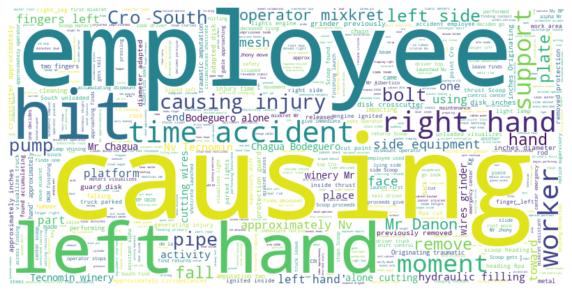

In [89]:
stopwords = STOPWORDS


wordcloud = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(data['Description'].values))


plt.figure( figsize=(10,10) )
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


These are the most frequent words in the new upsampled dataset.

Performed Bigram,trigrams as a part of data pre processing.

In [90]:
get_bigrams=[]
for input_list in questionText_nostops:
  output_list=[]
  for index in range(len(input_list)):
    try:
      output_string = input_list[index]+ "_" + input_list[index+1]
      output_list.append(output_string)
    except IndexError: 
      pass
  get_bigrams.append(output_list)
print(get_bigrams)

[['activation_sodium', 'sodium_sulphide', 'sulphide_pump', 'pump_pip', 'pip_uncouple', 'uncouple_sulfide', 'sulfide_solution', 'solution_design', 'design_area', 'area_reach', 'reach_maid', 'maid_immediately', 'immediately_make', 'make_use', 'use_emergency', 'emergency_shower', 'shower_direct', 'direct_ambulatory', 'ambulatory_doctor', 'doctor_late', 'late_hospital', 'hospital_note', 'note_sulphide', 'sulphide_solution', 'solution_48', '48_gram', 'gram_liter'], ['sub_station', 'station_milpo', 'milpo_locate', 'locate_level', 'level_170', '170_collaborator', 'collaborator_excavation', 'excavation_work', 'work_pick', 'pick_hand', 'hand_tool', 'tool_hit', 'hit_rock', 'rock_flat', 'flat_part', 'part_beak', 'beak_bounce', 'bounce_hit', 'hit_steel', 'steel_tip', 'tip_safety', 'safety_shoe', 'shoe_metatarsal', 'metatarsal_area', 'area_leave', 'leave_foot', 'foot_collaborator', 'collaborator_cause', 'cause_injury'], ['9_45', '45_approximately', 'approximately_nv', 'nv_1880', '1880_cx', 'cx_695'

In [91]:
get_trigrams=[]
for input_list in questionText_nostops:
  output_list=[]
  for index in range(len(input_list)):
    try:
      output_string = input_list[index]+ "_" + input_list[index+1]+"_"+ input_list[index+2]
      output_list.append(output_string)
    except IndexError: 
      pass
  get_trigrams.append(output_list)
print(get_trigrams)

[['activation_sodium_sulphide', 'sodium_sulphide_pump', 'sulphide_pump_pip', 'pump_pip_uncouple', 'pip_uncouple_sulfide', 'uncouple_sulfide_solution', 'sulfide_solution_design', 'solution_design_area', 'design_area_reach', 'area_reach_maid', 'reach_maid_immediately', 'maid_immediately_make', 'immediately_make_use', 'make_use_emergency', 'use_emergency_shower', 'emergency_shower_direct', 'shower_direct_ambulatory', 'direct_ambulatory_doctor', 'ambulatory_doctor_late', 'doctor_late_hospital', 'late_hospital_note', 'hospital_note_sulphide', 'note_sulphide_solution', 'sulphide_solution_48', 'solution_48_gram', '48_gram_liter'], ['sub_station_milpo', 'station_milpo_locate', 'milpo_locate_level', 'locate_level_170', 'level_170_collaborator', '170_collaborator_excavation', 'collaborator_excavation_work', 'excavation_work_pick', 'work_pick_hand', 'pick_hand_tool', 'hand_tool_hit', 'tool_hit_rock', 'hit_rock_flat', 'rock_flat_part', 'flat_part_beak', 'part_beak_bounce', 'beak_bounce_hit', 'boun

With the tokens available for all samples, it is time to create the word-index dictionary for changing the data to numerical values. To do this, Tensorflow's tokenizer class will be used.

In [92]:
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts( questionText_nostops ) 
tokenized_questions = tokenizer.texts_to_sequences( questionText_nostops ) 
print('Sample tokenized: {}'.format(tokenized_questions[0]))
print('==================================================================================================================\n')

    
length_list = list()
for token_seq in tokenized_questions:
    length_list.append( len( token_seq ))
max_input_length = np.array( length_list ).max()
print( 'Questions max length is {} words'.format( max_input_length ))
print('==================================================================================================================\n')

padded_questions = preprocessing.sequence.pad_sequences( tokenized_questions , maxlen=max_input_length , padding='post' )
input_data = np.array( padded_questions )
print( 'Input data shape -> {}\n'.format( input_data.shape ))
print('Input data sample->\n {}'.format(input_data[0]))
print('==================================================================================================================\n')

question_word_dict = tokenizer.word_index
num_question_tokens = len( question_word_dict )+1
print( 'Number of Question tokens = {}\n'.format( num_question_tokens))
print('Dictionary: {}'.format(question_word_dict))

Sample tokenized: [922, 923, 672, 55, 298, 924, 925, 354, 673, 51, 186, 484, 135, 94, 23, 86, 926, 485, 927, 928, 424, 355, 674, 672, 354, 929, 930, 931]

Questions max length is 97 words

Input data shape -> (261, 97)

Input data sample->
 [922 923 672  55 298 924 925 354 673  51 186 484 135  94  23  86 926 485
 927 928 424 355 674 672 354 929 930 931   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]

Number of Question tokens = 1759

Dictionary: {'leave': 1, 'operator': 2, 'hand': 3, 'cause': 4, 'right': 5, 'employee': 6, 'time': 7, 'mr': 8, 'approximately': 9, 'find': 10, 'scoop': 11, 'accident': 12, 'injury': 13, 'moment': 14, 'cut': 15, 'side': 16, 'finger': 17, 'activity': 18, '0': 19, 'work': 20, 'equipment': 21, 'collaborator': 22, 'use': 23, 'hit': 2

Finally, with the input data ready with the numerical token indices, it is time to split the dataset into training and testing sets.

Spliting the dataset

In [93]:
x_train, x_test, y_train, y_test = train_test_split(input_data, targetdf, test_size = 0.3, random_state=2)

In [94]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(182, 97) (79, 97)
(182, 5) (79, 5)


#Machine Learning Classifiers

In Machine learning models target must be in a singlelabel.

In [95]:
Y = data['Accident Level']
print(Y.shape)

(261,)


In [96]:
x_train, x_test, y_train_ML, y_test_ML = train_test_split(input_data, Y, test_size = 0.3, random_state=2)

In [97]:
print(x_train.shape, x_test.shape)
print(y_train_ML.shape, y_test_ML.shape)

(182, 97) (79, 97)
(182,) (79,)


In [98]:
x_train

array([[  14, 1562,   84, ...,    0,    0,    0],
       [ 426,  148,   75, ...,    0,    0,    0],
       [ 793,  226,  229, ...,    0,    0,    0],
       ...,
       [ 105,   70,   45, ...,    0,    0,    0],
       [   9,   47,  148, ...,    0,    0,    0],
       [ 419,  213,    7, ...,    0,    0,    0]], dtype=int32)

#### Define MultiClass-Logloss

In [99]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

#### Train and test model

In [100]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

    if method == 'CatBoostClassifier' or method == 'LGBMClassifier':

      model.fit(X_train, y_train) # Fit the model on Training set
    else:
      model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
      mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsdata = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              'Multi-Class Logloss': mc_logloss}, index=[index])
    
    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))
      
    return resultsdata  # return all the metrics along with predictions

#### Train and test all models

In [101]:
import lightgbm as lgb

def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)],
        ['LGBMClassifier',LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")],
                                         #early_stopping_rounds = 30)],
        ['XGBClassifier',XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, 
                                       colsample_bytree = 0.5)]
    ]

    resultsdata_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsdata = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsdata_common = pd.concat([resultsdata_common, reg_resultsdata])
        i = i+1

    return resultsdata_common

#Random Forest Classifier

In [102]:
rfclassifier = RandomForestClassifier(n_estimators = 50)
rfclassifier.fit(x_train, y_train_ML)

RandomForestClassifier(n_estimators=50)

In [103]:
y_predict_rf= rfclassifier.predict(x_test)
y_predict_rf

array(['V', 'V', 'I', 'I', 'V', 'I', 'I', 'I', 'I', 'IV', 'V', 'IV', 'I',
       'I', 'V', 'III', 'II', 'II', 'V', 'V', 'I', 'I', 'I', 'V', 'I',
       'V', 'I', 'IV', 'II', 'I', 'I', 'V', 'IV', 'I', 'V', 'V', 'V',
       'II', 'V', 'I', 'V', 'V', 'I', 'II', 'I', 'I', 'I', 'V', 'V', 'I',
       'I', 'I', 'V', 'V', 'V', 'V', 'I', 'I', 'I', 'III', 'I', 'I', 'V',
       'II', 'I', 'I', 'II', 'I', 'IV', 'I', 'V', 'I', 'I', 'III', 'I',
       'I', 'I', 'V', 'I'], dtype=object)

In [104]:
Accuracy_rf = accuracy_score(y_test_ML,y_predict_rf)
print("RF Model Accuracy%:",Accuracy_rf)
cm_rf = metrics.confusion_matrix(y_test_ML,y_predict_rf)
cm_rf

RF Model Accuracy%: 0.5063291139240507


array([[15,  4,  1,  0,  1],
       [11,  0,  0,  0,  0],
       [ 9,  2,  1,  4,  0],
       [ 4,  1,  1,  1,  1],
       [ 0,  0,  0,  0, 23]])

In [105]:
rf_mod_acc = print('RF Model Accuracy With Data Augmentation & Downsampling/Upsampling: ', Accuracy_rf*100,'%')
rf_mod_acc

RF Model Accuracy With Data Augmentation & Downsampling/Upsampling:  50.63291139240506 %


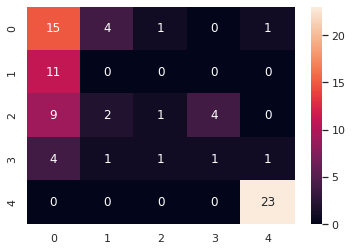

In [106]:
df_cm_rf = pd.DataFrame(cm_rf)
sns.heatmap(df_cm_rf,annot=True)

In [107]:
report= classification_report(y_test_ML,y_predict_rf)
print(report)

              precision    recall  f1-score   support

           I       0.38      0.71      0.50        21
          II       0.00      0.00      0.00        11
         III       0.33      0.06      0.11        16
          IV       0.20      0.12      0.15         8
           V       0.92      1.00      0.96        23

    accuracy                           0.51        79
   macro avg       0.37      0.38      0.34        79
weighted avg       0.46      0.51      0.45        79



In [108]:
result = pd.DataFrame({'Model': ['RandomForestClassifier'],'Test Accuracy':[Accuracy_rf]})


#Support Vector Classifier

In [109]:
#using support vector classifier
svc = svm.SVC(gamma=0.025,C=1)
svc.fit(x_train,y_train_ML)
y_predict_svc = svc.predict(x_test)
y_predict_svc

array(['V', 'V', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'V', 'I', 'I',
       'I', 'V', 'I', 'I', 'I', 'V', 'V', 'I', 'I', 'I', 'V', 'I', 'V',
       'I', 'I', 'II', 'I', 'I', 'V', 'I', 'I', 'V', 'V', 'V', 'I', 'V',
       'I', 'V', 'V', 'I', 'I', 'I', 'I', 'I', 'V', 'V', 'I', 'I', 'I',
       'V', 'V', 'V', 'V', 'I', 'I', 'I', 'I', 'I', 'I', 'V', 'I', 'I',
       'I', 'I', 'I', 'I', 'I', 'V', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'I'], dtype=object)

In [110]:
Accuracy_svc = accuracy_score(y_test_ML,y_predict_svc)
print("SVC Model Accuracy%:",Accuracy_svc)
cm_svc = metrics.confusion_matrix(y_test_ML,y_predict_svc)
cm_svc

SVC Model Accuracy%: 0.5569620253164557


array([[21,  0,  0,  0,  0],
       [11,  0,  0,  0,  0],
       [16,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 23]])

In [111]:
svc_mod_acc = print( 'SVC Model Accuracy With Data Augmentation & Downsampling/Upsampling: ', Accuracy_svc*100,'%')
svc_mod_acc

SVC Model Accuracy With Data Augmentation & Downsampling/Upsampling:  55.69620253164557 %


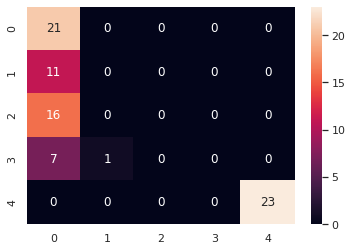

In [112]:
df_cm_svc= pd.DataFrame(cm_svc)
sns.heatmap(df_cm_svc,annot=True)

In [113]:
report= classification_report(y_test_ML,y_predict_svc)
print(report)

              precision    recall  f1-score   support

           I       0.38      1.00      0.55        21
          II       0.00      0.00      0.00        11
         III       0.00      0.00      0.00        16
          IV       0.00      0.00      0.00         8
           V       1.00      1.00      1.00        23

    accuracy                           0.56        79
   macro avg       0.28      0.40      0.31        79
weighted avg       0.39      0.56      0.44        79



In [114]:
result.loc[1] = ['Support Vector Classifier',Accuracy_svc]

#Decision Tree Classifier

In [115]:
DTC = DecisionTreeClassifier(criterion='gini')
DTC.fit(x_train,y_train_ML)
y_predict_DTC = DTC.predict(x_test)
y_predict_DTC

array(['V', 'V', 'II', 'II', 'II', 'I', 'II', 'I', 'II', 'III', 'V', 'II',
       'I', 'III', 'V', 'III', 'II', 'II', 'V', 'V', 'I', 'IV', 'I', 'V',
       'II', 'V', 'I', 'III', 'II', 'III', 'I', 'V', 'II', 'I', 'V', 'V',
       'V', 'I', 'V', 'I', 'V', 'V', 'I', 'II', 'I', 'II', 'I', 'V', 'V',
       'I', 'I', 'I', 'V', 'V', 'V', 'V', 'II', 'I', 'I', 'IV', 'I', 'II',
       'V', 'I', 'II', 'III', 'I', 'II', 'III', 'II', 'V', 'II', 'II',
       'IV', 'III', 'IV', 'I', 'I', 'II'], dtype=object)

In [116]:
Accuracy_dtc = accuracy_score(y_test_ML,y_predict_DTC)
print("DTC Accuracy:",Accuracy_dtc)

cm_DTC = metrics.confusion_matrix(y_test_ML,y_predict_DTC)
cm_DTC

DTC Accuracy: 0.5063291139240507


array([[10,  9,  1,  1,  0],
       [ 5,  3,  2,  1,  0],
       [ 5,  7,  3,  1,  0],
       [ 3,  2,  2,  1,  0],
       [ 0,  0,  0,  0, 23]])

In [117]:
dtc_mod_acc = print( 'DTC Model Accuracy With Data Augmentation & Downsampling/Upsampling: ', Accuracy_dtc*100,'%')
dtc_mod_acc

DTC Model Accuracy With Data Augmentation & Downsampling/Upsampling:  50.63291139240506 %


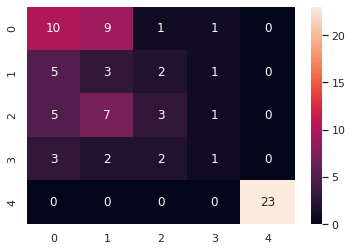

In [118]:
df_cm_DTC= pd.DataFrame(cm_DTC)
sns.heatmap(df_cm_DTC,annot=True)

In [119]:
report= classification_report(y_test_ML,y_predict_DTC)
print(report)

              precision    recall  f1-score   support

           I       0.43      0.48      0.45        21
          II       0.14      0.27      0.19        11
         III       0.38      0.19      0.25        16
          IV       0.25      0.12      0.17         8
           V       1.00      1.00      1.00        23

    accuracy                           0.51        79
   macro avg       0.44      0.41      0.41        79
weighted avg       0.53      0.51      0.51        79



In [120]:
result.loc[2]= ['DecisionTree Classifier',Accuracy_dtc]

# MultinomialNB

In [121]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train_ML)

y_pred_MNB = classifier.predict(x_test)
y_pred_MNB

array(['III', 'II', 'II', 'III', 'IV', 'I', 'I', 'II', 'I', 'IV', 'V',
       'III', 'I', 'III', 'V', 'V', 'IV', 'II', 'II', 'II', 'I', 'I',
       'II', 'II', 'I', 'V', 'IV', 'V', 'I', 'II', 'I', 'II', 'III', 'IV',
       'V', 'III', 'II', 'I', 'V', 'II', 'II', 'V', 'I', 'II', 'II', 'I',
       'I', 'V', 'II', 'I', 'I', 'IV', 'II', 'V', 'V', 'III', 'I', 'I',
       'I', 'V', 'I', 'I', 'II', 'I', 'I', 'II', 'II', 'I', 'IV', 'I',
       'II', 'II', 'I', 'IV', 'II', 'II', 'II', 'V', 'III'], dtype='<U3')

In [122]:
Accuracy_mnb = accuracy_score(y_test_ML,y_pred_MNB)
print(" MNB Accuracy:",Accuracy_mnb)

cm_MNB = metrics.confusion_matrix(y_test_ML,y_predict_DTC)
cm_MNB

 MNB Accuracy: 0.3291139240506329


array([[10,  9,  1,  1,  0],
       [ 5,  3,  2,  1,  0],
       [ 5,  7,  3,  1,  0],
       [ 3,  2,  2,  1,  0],
       [ 0,  0,  0,  0, 23]])

In [123]:
mnb_mod_acc = print( 'MNB Model Accuracy With Data Augmentation & Downsampling/Upsampling: ', Accuracy_mnb*100,'%')
mnb_mod_acc

MNB Model Accuracy With Data Augmentation & Downsampling/Upsampling:  32.91139240506329 %


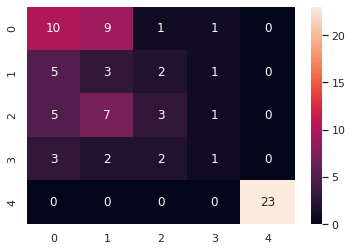

In [124]:
df_cm_MNB = pd.DataFrame(cm_MNB)
sns.heatmap(df_cm_MNB,annot=True)

In [125]:
report= classification_report(y_test_ML,y_pred_MNB)
print(report)

              precision    recall  f1-score   support

           I       0.44      0.52      0.48        21
          II       0.08      0.18      0.11        11
         III       0.25      0.12      0.17        16
          IV       0.25      0.25      0.25         8
           V       0.69      0.39      0.50        23

    accuracy                           0.33        79
   macro avg       0.34      0.29      0.30        79
weighted avg       0.41      0.33      0.35        79



In [126]:
result.loc[3]= ['Multinominal NB',Accuracy_mnb]
result

Model  Test Accuracy
0     RandomForestClassifier       0.506329
1  Support Vector Classifier       0.556962
2    DecisionTree Classifier       0.506329
3            Multinominal NB       0.329114

Observations: In Machine learning Classification Models Recall and F1 scores are too low, trying few of deep learning models to get good accuracy and reduce the loss.

#Convolution Neural Network 

In [127]:
input_shape = (4,10,128)
input_shape[1:]

(10, 128)

In [128]:
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D
from keras.models import Model
from tensorflow import keras

In [129]:
from keras.layers import Embedding
# the dimension of vectors to be used
EMBEDDING_DIM = 100
# filter sizes of the different conv layers 
filter_sizes = [3,4,5]
num_filters = 512
embedding_dim = 100

In [130]:
embedding_layer = Embedding(len(question_word_dict) + 1,EMBEDDING_DIM,input_length=max_input_length,
                            trainable=False)#weights=[embedding_matrix],
inputs = Input(shape=(max_input_length,), dtype='int32')
embedding = embedding_layer(inputs)
print(embedding.shape)

reshape = Reshape((max_input_length,EMBEDDING_DIM,1))(embedding)
print(reshape.shape)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)


maxpool_0 = MaxPool2D(pool_size=(max_input_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(max_input_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(max_input_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)


concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(0.2)(flatten)
output = Dense(units=5, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy', 'Precision', 'Recall'])

(None, 97, 100)
(None, 97, 100, 1)


In [131]:
reshape = Reshape((max_input_length,EMBEDDING_DIM,1))(embedding)
print(reshape.shape)

(None, 97, 100, 1)


In [132]:
conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)


maxpool_0 = MaxPool2D(pool_size=(max_input_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(max_input_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(max_input_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)


concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(0.2)(flatten)
output = Dense(units=5, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

In [133]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy', 'Precision', 'Recall'])

In [134]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 97)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 97, 100)      175900      ['input_1[0][0]']                
                                                                                                  
 reshape_1 (Reshape)            (None, 97, 100, 1)   0           ['embedding[0][0]']              
                                                                                                  
 conv2d_3 (Conv2D)              (None, 95, 1, 512)   154112      ['reshape_1[0][0]']              
                                                                                            

In [135]:
CNN_model_history = model.fit(x_train, y_train, batch_size=35, epochs=20, verbose=1,validation_split=0.15)

Epoch 1/20
5/5 [==============================] - 2s 228ms/step - loss: 1.5633 - accuracy: 0.3766 - precision: 0.5493 - recall: 0.2532 - val_loss: 1.1922 - val_accuracy: 0.3929 - val_precision: 1.0000 - val_recall: 0.2143
Epoch 2/20
5/5 [==============================] - 1s 134ms/step - loss: 0.9592 - accuracy: 0.6688 - precision: 1.0000 - recall: 0.2987 - val_loss: 0.8733 - val_accuracy: 0.6786 - val_precision: 0.7037 - val_recall: 0.6786
Epoch 3/20
5/5 [==============================] - 1s 137ms/step - loss: 0.6145 - accuracy: 0.6818 - precision: 0.7920 - recall: 0.6429 - val_loss: 0.7414 - val_accuracy: 0.7143 - val_precision: 1.0000 - val_recall: 0.4286
Epoch 4/20
5/5 [==============================] - 1s 137ms/step - loss: 0.2643 - accuracy: 1.0000 - precision: 1.0000 - recall: 0.9740 - val_loss: 0.8886 - val_accuracy: 0.6786 - val_precision: 1.0000 - val_recall: 0.5000
Epoch 5/20
5/5 [==============================] - 1s 134ms/step - loss: 0.1201 - accuracy: 1.0000 - precision: 1

In [136]:
predict_CNN = model.predict(x_test)
predict_CNN.shape

(79, 5)

In [137]:
dataframe = predict_CNN.reshape(-1,1)
print(dataframe.shape)
df = pd.DataFrame(dataframe,columns=["classes"])
df

(395, 1)


classes
0    0.000008
1    0.000010
2    0.000024
3    0.000024
4    0.999933
..        ...
390  0.958194
391  0.008903
392  0.011629
393  0.017963
394  0.003311

[395 rows x 1 columns]

In [138]:
pre_test=np.argmax(np.array(predict_CNN),axis=-1)
print(pre_test)
df = pd.DataFrame(pre_test,columns=["classes"])
print(df)

[4 4 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0 4 4 0 0 0 4 0 4 0 0 1 0 0 4 0 0 4 4 4
 0 4 0 4 4 0 0 0 0 0 4 4 0 0 0 4 4 4 4 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 1
 0 0 0 0 0]
    classes
0         4
1         4
2         0
3         0
4         0
..      ...
74        0
75        0
76        0
77        0
78        0

[79 rows x 1 columns]


In [139]:
CNN_history_df = pd.DataFrame(CNN_model_history.history)
CNN_history_df['f1_score'] = (2 * CNN_history_df['precision']*CNN_history_df['recall'])/(CNN_history_df['precision']+CNN_history_df['recall'])
CNN_history_df['val_f1_score'] = (2 * CNN_history_df['val_precision']*CNN_history_df['val_recall'])/(CNN_history_df['val_precision']+CNN_history_df['val_recall'])

In [140]:
CNN_history_df

loss  accuracy  precision    recall  val_loss  val_accuracy  \
0   1.563297  0.376623   0.549296  0.253247  1.192238      0.392857   
1   0.959241  0.668831   1.000000  0.298701  0.873324      0.678571   
2   0.614529  0.681818   0.792000  0.642857  0.741396      0.714286   
3   0.264343  1.000000   1.000000  0.974026  0.888568      0.678571   
4   0.120091  1.000000   1.000000  1.000000  0.811489      0.678571   
5   0.034898  1.000000   1.000000  1.000000  0.773111      0.714286   
6   0.014327  1.000000   1.000000  1.000000  0.754969      0.714286   
7   0.005473  1.000000   1.000000  1.000000  0.788250      0.678571   
8   0.002698  1.000000   1.000000  1.000000  0.848319      0.678571   
9   0.001901  1.000000   1.000000  1.000000  0.911054      0.678571   
10  0.001306  1.000000   1.000000  1.000000  0.955638      0.678571   
11  0.001043  1.000000   1.000000  1.000000  0.977733      0.678571   
12  0.000861  1.000000   1.000000  1.000000  0.989525      0.678571   
13  0.000767  1.000000   1.000000  1.000000  0.993086      0.678571   
14  0.000703  1.000000   1.000000  1.000000  0.988942      0.678571   
15  0.000629  1.000000   1.000000  1.000000  0.984238      0.678571   
16  0.000617  1.000000   1.000000  1.000000  0.978975      0.678571   
17  0.000584  1.000000   1.000000  1.000000  0.972838      0.678571   
18  0.000550  1.000000   1.000000  1.000000  0.969396      0.678571   
19  0.000568  1.000000   1.000000  1.000000  0.966951      0.678571   

    val_precision  val_recall  f1_score  val_f1_score  
0        1.000000    0.214286  0.346667      0.352941  
1        0.703704    0.678571  0.460000      0.690909  
2        1.000000    0.428571  0.709677      0.600000  
3        1.000000    0.500000  0.986842      0.666667  
4        0.703704    0.678571  1.000000      0.690909  
5        0.703704    0.678571  1.000000      0.690909  
6        0.703704    0.678571  1.000000      0.690909  
7        0.703704    0.678571  1.000000      0.690909  
8        0.703704    0.678571  1.000000      0.690909  
9        0.703704    0.678571  1.000000      0.690909  
10       0.703704    0.678571  1.000000      0.690909  
11       0.703704    0.678571  1.000000      0.690909  
12       0.703704    0.678571  1.000000      0.690909  
13       0.703704    0.678571  1.000000      0.690909  
14       0.703704    0.678571  1.000000      0.690909  
15       0.703704    0.678571  1.000000      0.690909  
16       0.703704    0.678571  1.000000      0.690909  
17       0.703704    0.678571  1.000000      0.690909  
18       0.703704    0.678571  1.000000      0.690909  
19       0.703704    0.678571  1.000000      0.690909

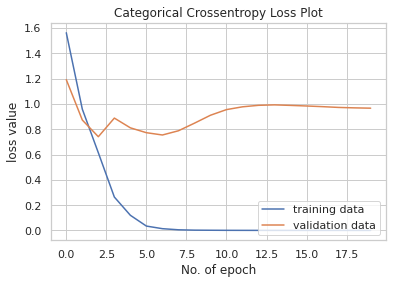

In [141]:
plt.plot(CNN_history_df['loss'], label='training data')
plt.plot(CNN_history_df['val_loss'], label='validation data')
plt.title('Categorical Crossentropy Loss Plot')
plt.ylabel('loss value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")
plt.show()

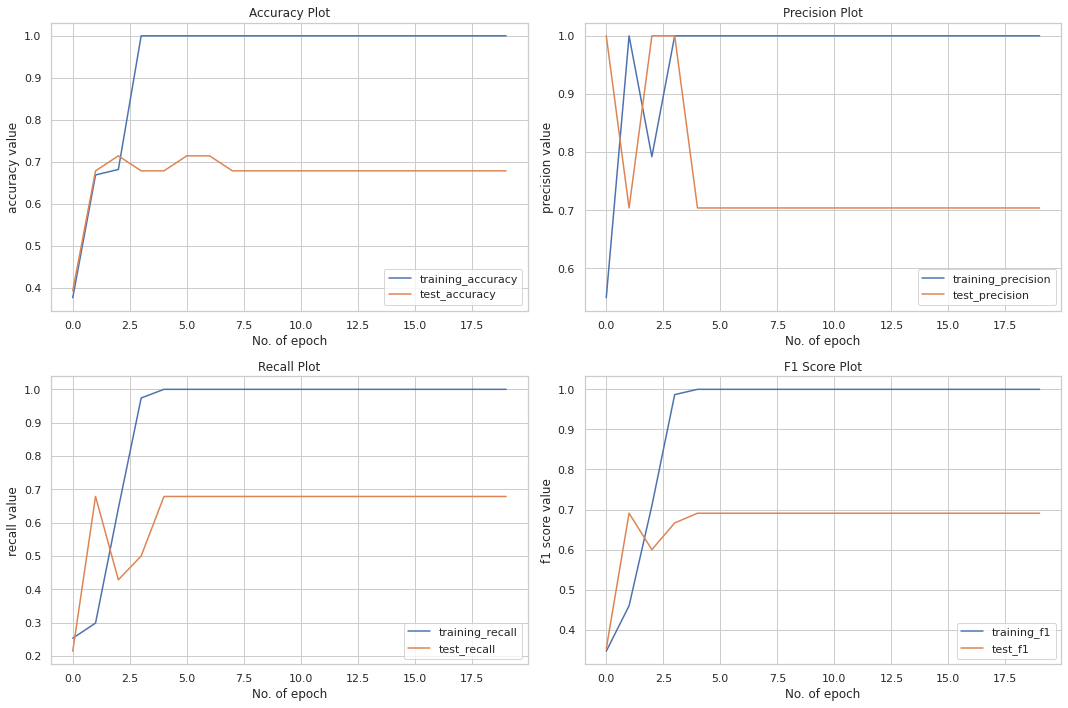

In [142]:
plt.subplots(figsize=(15,10))
ax = plt.subplot(2,2,1)
plt.plot(CNN_history_df['accuracy'], label='training_accuracy')
plt.plot(CNN_history_df['val_accuracy'], label='test_accuracy')
plt.title('Accuracy Plot')
plt.ylabel('accuracy value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,2)
plt.plot(CNN_history_df['precision'], label='training_precision')
plt.plot(CNN_history_df['val_precision'], label='test_precision')
plt.title('Precision Plot')
plt.ylabel('precision value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,3)
plt.plot(CNN_history_df['recall'], label='training_recall')
plt.plot(CNN_history_df['val_recall'], label='test_recall')
plt.title('Recall Plot')
plt.ylabel('recall value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,4)
plt.plot(CNN_history_df['f1_score'], label='training_f1')
plt.plot(CNN_history_df['val_f1_score'], label='test_f1')
plt.title('F1 Score Plot')
plt.ylabel('f1 score value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#CNN With Batch Normalization

In [143]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [144]:
max_features = 20000
embedding_dim=200
seaquence_length = 97


model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=seaquence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))                                    

model.add(tf.keras.layers.Conv1D(128,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005)))                               


model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(BatchNormalization())

model.add(tf.keras.layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(5, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))

In [145]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 97, 200)           4000200   
                                                                 
 conv1d (Conv1D)             (None, 95, 128)           76928     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              5

In [146]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy', 'Precision', 'Recall'])

In [147]:
Batch_CNN_model_history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1,validation_split=0.15)

Epoch 1/50
5/5 [==============================] - 2s 143ms/step - loss: 2.5034 - accuracy: 0.4675 - precision: 0.2513 - recall: 0.6104 - val_loss: 1.6515 - val_accuracy: 0.3929 - val_precision: 0.2222 - val_recall: 0.7143
Epoch 2/50
5/5 [==============================] - 0s 60ms/step - loss: 0.5853 - accuracy: 0.9870 - precision: 0.5033 - recall: 1.0000 - val_loss: 1.8445 - val_accuracy: 0.3571 - val_precision: 0.2603 - val_recall: 0.6786
Epoch 3/50
5/5 [==============================] - 0s 55ms/step - loss: 0.6149 - accuracy: 1.0000 - precision: 0.5423 - recall: 1.0000 - val_loss: 1.7795 - val_accuracy: 0.3571 - val_precision: 0.2727 - val_recall: 0.6429
Epoch 4/50
5/5 [==============================] - 0s 58ms/step - loss: 0.5872 - accuracy: 0.9935 - precision: 0.5480 - recall: 1.0000 - val_loss: 1.8519 - val_accuracy: 0.3571 - val_precision: 0.2656 - val_recall: 0.6071
Epoch 5/50
5/5 [==============================] - 0s 60ms/step - loss: 0.6376 - accuracy: 0.9935 - precision: 0.558

In [148]:
Batch_CNN_model_history_df = pd.DataFrame(Batch_CNN_model_history.history)
Batch_CNN_model_history_df['f1_score'] = (2 * Batch_CNN_model_history_df['precision']*Batch_CNN_model_history_df['recall'])/(Batch_CNN_model_history_df['precision']+Batch_CNN_model_history_df['recall'])
Batch_CNN_model_history_df['val_f1_score'] = (2 * Batch_CNN_model_history_df['val_precision']*Batch_CNN_model_history_df['val_recall'])/(Batch_CNN_model_history_df['val_precision']+Batch_CNN_model_history_df['val_recall'])

In [149]:
Batch_CNN_model_history

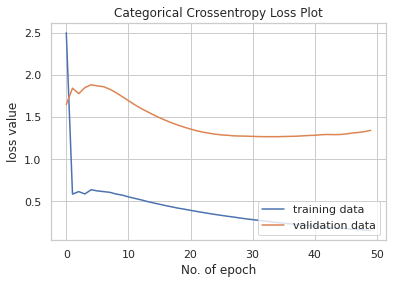

In [150]:
plt.plot(Batch_CNN_model_history_df['loss'], label='training data')
plt.plot(Batch_CNN_model_history_df['val_loss'], label='validation data')
plt.title('Categorical Crossentropy Loss Plot')
plt.ylabel('loss value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")
plt.show()

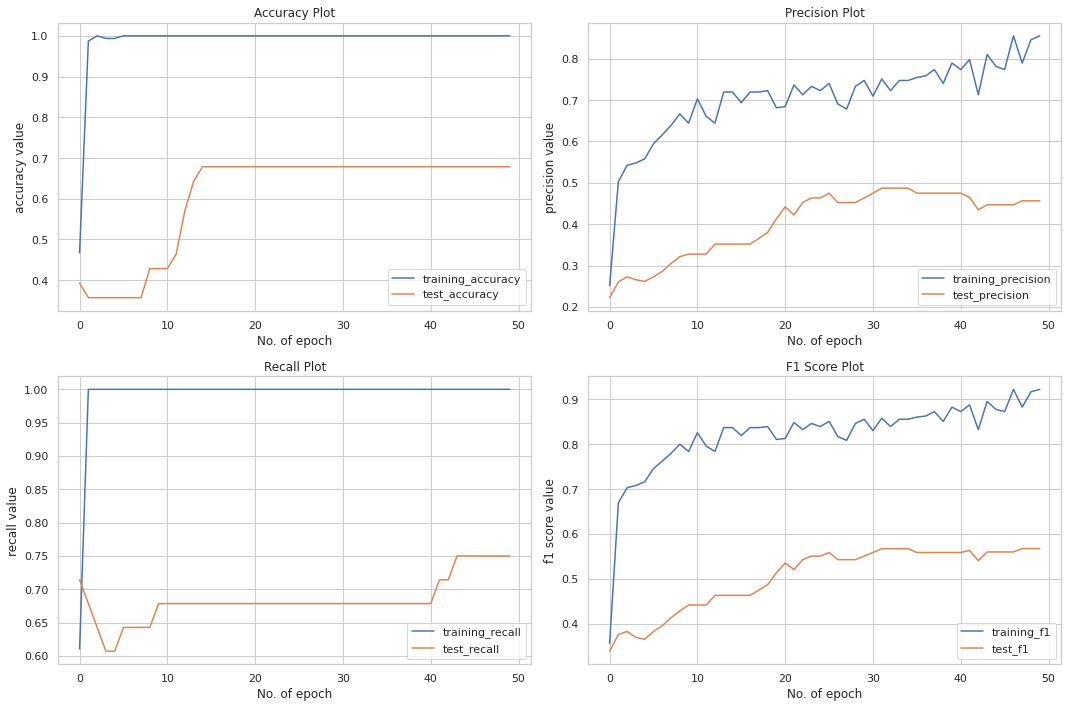

In [151]:
plt.subplots(figsize=(15,10))
ax = plt.subplot(2,2,1)
plt.plot(Batch_CNN_model_history_df['accuracy'], label='training_accuracy')
plt.plot(Batch_CNN_model_history_df['val_accuracy'], label='test_accuracy')
plt.title('Accuracy Plot')
plt.ylabel('accuracy value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,2)
plt.plot(Batch_CNN_model_history_df['precision'], label='training_precision')
plt.plot(Batch_CNN_model_history_df['val_precision'], label='test_precision')
plt.title('Precision Plot')
plt.ylabel('precision value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,3)
plt.plot(Batch_CNN_model_history_df['recall'], label='training_recall')
plt.plot(Batch_CNN_model_history_df['val_recall'], label='test_recall')
plt.title('Recall Plot')
plt.ylabel('recall value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,4)
plt.plot(Batch_CNN_model_history_df['f1_score'], label='training_f1')
plt.plot(Batch_CNN_model_history_df['val_f1_score'], label='test_f1')
plt.title('F1 Score Plot')
plt.ylabel('f1 score value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

Observations: More fluctuations on accuracy, loss results. Not good to take these types of models into production, implementing another state of the art algorithms.

# Model Building - LSTM

Finally, in the below cell, the bi-directional LSTM model is defined.

In [152]:
inputs = tf.keras.layers.Input(shape=(None,))
embedding = tf.keras.layers.Embedding(num_question_tokens, 100, mask_zero=True)(inputs)
lstm_outputs = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_state=False,recurrent_dropout=0.1)) (embedding)
dense_outputs = tf.keras.layers.Dense(100, activation=tf.keras.activations.relu) (lstm_outputs)
outputs = tf.keras.layers.Dense(5, activation=tf.keras.activations.softmax) (dense_outputs)

LSTM_model = tf.keras.models.Model(inputs, outputs)
LSTM_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [153]:
LSTM_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 100)         175900    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 5)                 505       
                                                                 
Total params: 357,305
Trainable params: 357,305
Non-trainable params: 0
_____________________________________________________

The summary of the model is displayed above which shows a total of xxxx parameters. In below cell, the compiled model is trained upto xx epochs.

In [154]:
#Set batch size to 32 and epochs to 50
history = LSTM_model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1,validation_split=0.15)

Epoch 1/50
5/5 [==============================] - 7s 481ms/step - loss: 1.5986 - accuracy: 0.3506 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5658 - val_accuracy: 0.6071 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 1s 292ms/step - loss: 1.5421 - accuracy: 0.6104 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4749 - val_accuracy: 0.6429 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 1s 306ms/step - loss: 1.4118 - accuracy: 0.5519 - precision: 0.9000 - recall: 0.0584 - val_loss: 1.2958 - val_accuracy: 0.5000 - val_precision: 0.9091 - val_recall: 0.3571
Epoch 4/50
5/5 [==============================] - 1s 287ms/step - loss: 1.2422 - accuracy: 0.5195 - precision: 0.9556 - recall: 0.2792 - val_loss: 1.1463 - val_accuracy: 0.6786 - val_precision: 1.0000 - val_recall: 0.2857
Epoch 5/50
5/5 [==============================] - 1s 293ms/step - loss: 1.0079 -

In [155]:
history_df = pd.DataFrame(history.history)
history_df['f1_score'] = (2 * history_df['precision']*history_df['recall'])/(history_df['precision']+history_df['recall'])
history_df['val_f1_score'] = (2 * history_df['val_precision']*history_df['val_recall'])/(history_df['val_precision']+history_df['val_recall'])

In [156]:
history_df

loss  accuracy  precision    recall  val_loss  val_accuracy  \
0   1.598610  0.350649   0.000000  0.000000  1.565812      0.607143   
1   1.542114  0.610390   0.000000  0.000000  1.474943      0.642857   
2   1.411750  0.551948   0.900000  0.058442  1.295795      0.500000   
3   1.242201  0.519481   0.955556  0.279221  1.146276      0.678571   
4   1.007866  0.623377   0.979167  0.305195  0.908353      0.678571   
5   0.799147  0.629870   0.988235  0.545455  0.935825      0.678571   
6   0.711343  0.649351   0.923810  0.629870  0.799604      0.678571   
7   0.588350  0.746753   0.989796  0.629870  1.028219      0.678571   
8   0.514224  0.857143   0.979798  0.629870  0.742178      0.642857   
9   0.444307  0.889610   1.000000  0.629870  0.788020      0.714286   
10  0.382447  0.889610   0.972727  0.694805  1.467754      0.607143   
11  0.296083  0.889610   0.957143  0.870130  0.979811      0.607143   
12  0.298068  0.889610   0.907285  0.889610  1.597147      0.642857   
13  0.423707  0.863636   0.875000  0.863636  1.281435      0.535714   
14  0.216756  0.935065   0.933775  0.915584  1.422102      0.642857   
15  0.189473  0.935065   0.935065  0.935065  1.085224      0.607143   
16  0.220187  0.974026   0.980263  0.967532  1.107067      0.642857   
17  0.119094  0.993506   0.993506  0.993506  1.131475      0.607143   
18  0.102799  1.000000   1.000000  1.000000  1.254343      0.571429   
19  0.094868  0.987013   0.987013  0.987013  1.316408      0.607143   
20  0.074399  1.000000   1.000000  1.000000  1.405713      0.607143   
21  0.048023  1.000000   1.000000  1.000000  1.399636      0.607143   
22  0.036633  0.993506   0.993506  0.993506  1.387433      0.642857   
23  0.023755  1.000000   1.000000  1.000000  1.421176      0.607143   
24  0.019503  1.000000   1.000000  1.000000  1.437208      0.642857   
25  0.015215  1.000000   1.000000  1.000000  1.460320      0.642857   
26  0.011293  1.000000   1.000000  1.000000  1.499524      0.642857   
27  0.008307  1.000000   1.000000  1.000000  1.566691      0.642857   
28  0.006175  1.000000   1.000000  1.000000  1.631845      0.642857   
29  0.005039  1.000000   1.000000  1.000000  1.692800      0.642857   
30  0.004156  1.000000   1.000000  1.000000  1.740256      0.642857   
31  0.003548  1.000000   1.000000  1.000000  1.781162      0.642857   
32  0.003051  1.000000   1.000000  1.000000  1.810368      0.642857   
33  0.002693  1.000000   1.000000  1.000000  1.829419      0.642857   
34  0.002451  1.000000   1.000000  1.000000  1.849051      0.642857   
35  0.002201  1.000000   1.000000  1.000000  1.870385      0.642857   
36  0.001996  1.000000   1.000000  1.000000  1.893696      0.642857   
37  0.001867  1.000000   1.000000  1.000000  1.920153      0.642857   
38  0.001730  1.000000   1.000000  1.000000  1.936196      0.642857   
39  0.001643  1.000000   1.000000  1.000000  1.950976      0.642857   
40  0.001461  1.000000   1.000000  1.000000  1.963933      0.642857   
41  0.001386  1.000000   1.000000  1.000000  1.975494      0.642857   
42  0.001271  1.000000   1.000000  1.000000  1.989424      0.642857   
43  0.001253  1.000000   1.000000  1.000000  2.010089      0.642857   
44  0.001184  1.000000   1.000000  1.000000  2.030620      0.642857   
45  0.001129  1.000000   1.000000  1.000000  2.044844      0.642857   
46  0.001065  1.000000   1.000000  1.000000  2.059800      0.642857   
47  0.000974  1.000000   1.000000  1.000000  2.077737      0.642857   
48  0.000983  1.000000   1.000000  1.000000  2.094592      0.642857   
49  0.000902  1.000000   1.000000  1.000000  2.105084      0.642857   

    val_precision  val_recall  f1_score  val_f1_score  
0        0.000000    0.000000       NaN           NaN  
1        0.000000    0.000000       NaN           NaN  
2        0.909091    0.357143  0.109756      0.512821  
3        1.000000    0.285714  0.432161      0.444444  
4        1.000000    0.357143  0.465347      0.526316  
5        0.730769    0.678571  0.702929      0.703

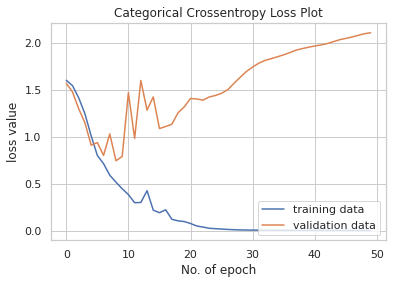

In [157]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Categorical Crossentropy Loss Plot')
plt.ylabel('loss value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")
plt.show()

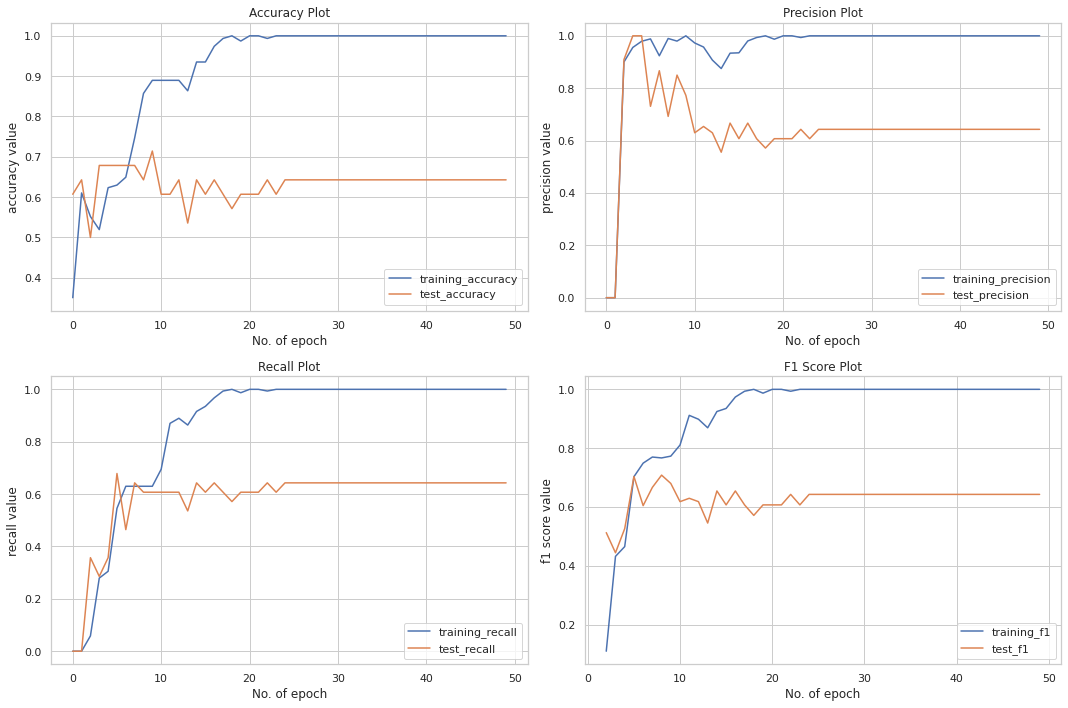

In [158]:
plt.subplots(figsize=(15,10))
ax = plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.title('Accuracy Plot')
plt.ylabel('accuracy value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,2)
plt.plot(history.history['precision'], label='training_precision')
plt.plot(history.history['val_precision'], label='test_precision')
plt.title('Precision Plot')
plt.ylabel('precision value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,3)
plt.plot(history.history['recall'], label='training_recall')
plt.plot(history.history['val_recall'], label='test_recall')
plt.title('Recall Plot')
plt.ylabel('recall value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,4)
plt.plot(history_df['f1_score'], label='training_f1')
plt.plot(history_df['val_f1_score'], label='test_f1')
plt.title('F1 Score Plot')
plt.ylabel('f1 score value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

Below, a predict function is defined that will take as input natural language text and try to classify it into the Potential Accident level defined from the dataset. 

#New Re-sampled dataset

In [159]:
data.columns = [c.replace(' ','_') for c in data.columns]

In [160]:
data.head()

Accident_Level                                        Description  Year  \
0              I  During the activation of a sodium sulphide pum...  2016   
1              I  In the sub-station MILPO located at level +170...  2016   
2              I  Being 9:45 am. approximately in the Nv. 1880 C...  2016   
3             IV  Approximately at 11:45 a.m. in circumstances t...  2016   
4              I  Employee was sitting in the resting area at le...  2016   

   Month  Day    Weekday  WeekofYear  Season  Is_Holiday  
0      1    2   Saturday          53  Summer           0  
1      1    6  Wednesday           1  Summer           0  
2      1    8     Friday           1  Summer           0  
3      1   10     Sunday           1  Summer           0  
4      1   19    Tuesday           3  Summer           0

In [161]:
data.Accident_Level.value_counts()

I      80
V      80
II     40
III    31
IV     30
Name: Accident_Level, dtype: int64

In [162]:
data = data[data.Accident_Level != 'VI']

In [163]:
data.Accident_Level.value_counts()

I      80
V      80
II     40
III    31
IV     30
Name: Accident_Level, dtype: int64

In [164]:
data['ylabeled'] = data['Accident_Level'].values
le = sklearn.preprocessing.LabelEncoder()
le.fit(data['Accident_Level'])

data['ylabeled'] = le.transform(data.ylabeled)

In [165]:
data.head(2)

Accident_Level                                        Description  Year  \
0              I  During the activation of a sodium sulphide pum...  2016   
1              I  In the sub-station MILPO located at level +170...  2016   

   Month  Day    Weekday  WeekofYear  Season  Is_Holiday  ylabeled  
0      1    2   Saturday          53  Summer           0         0  
1      1    6  Wednesday           1  Summer           0         0

In [166]:
data.Accident_Level.value_counts()

I      80
V      80
II     40
III    31
IV     30
Name: Accident_Level, dtype: int64

In [167]:
class4sample = data[data['ylabeled']== 4].sample(200,random_state=2,replace=True)
class0sample = data[data['ylabeled']== 0].sample(200,random_state=2,replace=True)
class1 = data[data['ylabeled']==1].sample(100,random_state=2,replace=True)
class2 = data[data['ylabeled']==2].sample(200,random_state=2,replace=True)
class3 = data[data['ylabeled']==3].sample(100,random_state=2,replace=True)

In [168]:
data_1 = pd.concat([class4sample,class0sample,class1,class2,class3],axis=0)

In [169]:
data_1.shape

(800, 10)

In [170]:
X_new = data_1.Description

In [171]:
y = data_1.ylabeled

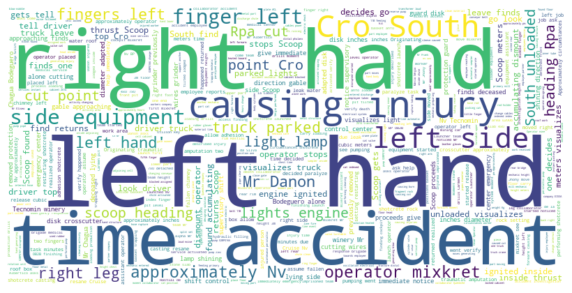

In [172]:
stopwords = STOPWORDS


wordcloud = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(X_new.values))


plt.figure( figsize=(10,10) )
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [173]:
X_train_txt, X_test_txt, y_train, y_test = train_test_split(X_new, y,test_size=0.2, random_state=1)

print("X_train_txt.shape:",X_train_txt.shape)
print("X_test_txt.shape",X_test_txt.shape)
print("y_train.shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train_txt.shape: (640,)
X_test_txt.shape (160,)
y_train.shape: (640,)
y_test shape: (160,)


In [174]:
y_train_enc = to_categorical(y_train, 5)
y_test_enc = to_categorical(y_test, 5)

print("y_train_enc.shape",y_train_enc.shape)
print("y_test_enc shape", y_test_enc.shape)

y_train_enc.shape (640, 5)
y_test_enc shape (160, 5)


In [175]:
max_words = 6000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train_txt.values.astype('U'))
sequences = tok.texts_to_sequences(X_train_txt.values.astype('U'))
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [176]:
sequences_matrix.shape


(640, 100)

In [177]:
sequences_test = tok.texts_to_sequences(X_test_txt.values.astype('U'))
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)

In [178]:
sequences_matrix_test.shape


(160, 100)

In [179]:
y_test_2d= y_test.values.reshape(-1,1)
print(type(y_test_2d))
print(y_test_2d.shape)

<class 'numpy.ndarray'>
(160, 1)


#Logistic Regression

In [180]:
logreg = LogisticRegression(C=1e9)
logreg.fit(sequences_matrix,y_train)
y_pred_class_logreg = logreg.predict(sequences_matrix_test)

In [181]:
Acc_lg =metrics.accuracy_score(y_test,y_pred_class_logreg)
f1_score_lg = metrics.f1_score(y_test, y_pred_class_logreg,average=None)

In [182]:
print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg,))
print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_logreg))
print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg,average=None))
print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg,average=None))
print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg,average=None))

LogisticReg ACCURACY: 0.94375
LogisticReg CLASSIFIER CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         37   2   1   0   0
1          0  15   0   2   0
2          0   0  41   0   0
3          0   4   0  22   0
4          0   0   0   0  36
===> **LogisticReg F1 SCORE [0.96103896 0.78947368 0.98795181 0.88       1.        ]
===> **LogisticReg Recall SCORE [0.925      0.88235294 1.         0.84615385 1.        ]
===> **LogisticReg Precision SCORE [1.         0.71428571 0.97619048 0.91666667 1.        ]


In [183]:
result = pd.DataFrame({'model':['Logistic Regression'],'Test Accuracy':[Acc_lg],'F1_score':[f1_score_lg],'Comments':'Accuracy is good,f1 score for all classes are not good'}) 

In [184]:
result

model  Test Accuracy  \
0  Logistic Regression        0.94375   

                                            F1_score  \
0  [0.961038961038961, 0.7894736842105262, 0.9879...   

                                            Comments  
0  Accuracy is good,f1 score for all classes are ...

#KNN Classifier

In [185]:
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [186]:
error = []
# Calculating error for K values for 5, 13 and 21
for i in range(1,49):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(sequences_matrix, y_train)
    pred_i = knn.predict(sequences_matrix_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

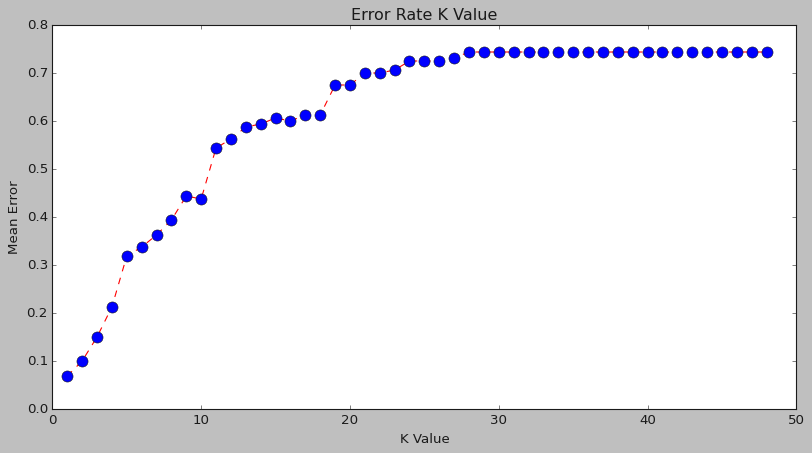

In [187]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1,49), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [188]:
knn = KNeighborsClassifier(n_neighbors=1) #at k=4 got 68%
knn.fit(sequences_matrix,y_train)
y_pred_class_knn = knn.predict(sequences_matrix_test)

In [189]:
acc_knn = metrics.accuracy_score(y_test,y_pred_class_knn)
f1_score_knn= metrics.f1_score(y_test, y_pred_class_knn,average=None)

In [190]:
print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_knn,))
print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_knn))
print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_knn,average=None))
print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_knn,average=None))
print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_knn,average=None))

LogisticReg ACCURACY: 0.93125
LogisticReg CLASSIFIER CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         34   0   1   0   5
1          0  16   0   0   1
2          0   0  41   0   0
3          0   4   0  22   0
4          0   0   0   0  36
===> **LogisticReg F1 SCORE [0.91891892 0.86486486 0.98795181 0.91666667 0.92307692]
===> **LogisticReg Recall SCORE [0.85       0.94117647 1.         0.84615385 1.        ]
===> **LogisticReg Precision SCORE [1.         0.8        0.97619048 1.         0.85714286]


In [191]:
result.loc[1]= ['KNN Classifier',acc_knn,f1_score_knn,'Accuracy is 80, class3 f1 score is too less']

#SVC Classifier

In [192]:
svcclassifier = SVC(random_state=0,kernel='rbf',C=10,probability=True)
svcclassifier.fit(sequences_matrix,y_train)

SVC(C=10, probability=True, random_state=0)

In [193]:
svcclassifier.score(sequences_matrix,y_train)

0.9953125

In [194]:
y_pred_svm = svcclassifier.predict(sequences_matrix_test)

In [195]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm,average=None))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm,average=None))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm,average=None))

SVM ACCURACY: 0.95625
SVM CLASSIFIER CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         39   0   1   0   0
1          1  15   1   0   0
2          0   0  41   0   0
3          0   4   0  22   0
4          0   0   0   0  36
===> **SVM F1 SCORE [0.975      0.83333333 0.97619048 0.91666667 1.        ]
===> **SVM Recall SCORE [0.975      0.88235294 1.         0.84615385 1.        ]
===> **SVM Precision SCORE [0.975      0.78947368 0.95348837 1.         1.        ]


In [196]:
acc_svc = metrics.accuracy_score(y_test,y_pred_svm)
f1_score_svc = metrics.f1_score(y_test, y_pred_svm,average=None)

In [197]:
result.loc[2]= ['SVC Classifier',acc_svc,f1_score_svc,'Accuracy is good']

#Multinominal Naive Bayes 

In [198]:
nb = MultinomialNB()
nb.fit(sequences_matrix,y_train)
y_pred_class_nb = nb.predict(sequences_matrix_test)

In [199]:
print("Multinominal NB ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_nb,))
print('MultinominalNB CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_nb))
print("===> **Multinominal NB F1 SCORE",metrics.f1_score(y_test, y_pred_class_nb,average=None))
print("===> **Multinominal NB Recall SCORE",metrics.recall_score(y_test, y_pred_class_nb,average=None))
print("===> **Multinominal NB Precision SCORE",metrics.precision_score(y_test, y_pred_class_nb,average=None))

Multinominal NB ACCURACY: 0.7
MultinominalNB CLASSIFIER CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         22  10   3   3   2
1          3  12   1   1   0
2          9   5  24   3   0
3          6   1   1  18   0
4          0   0   0   0  36
===> **Multinominal NB F1 SCORE [0.55       0.53333333 0.68571429 0.70588235 0.97297297]
===> **Multinominal NB Recall SCORE [0.55       0.70588235 0.58536585 0.69230769 1.        ]
===> **Multinominal NB Precision SCORE [0.55       0.42857143 0.82758621 0.72       0.94736842]


In [200]:
acc_mnb = metrics.accuracy_score(y_test,y_pred_class_nb,)
f1_score_mnb = metrics.f1_score(y_test, y_pred_class_nb,average=None)

In [201]:
result.loc[3]= ['Multinominal Naive bais Classifier',acc_mnb,f1_score_mnb,'Accuracy is poor']

#Decision Tree Classifier

In [202]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,class_weight={0:.7,1:.3}, min_samples_leaf=15)
classifier.fit(sequences_matrix,y_train)
y_pred_tree = classifier.predict(sequences_matrix_test)

In [203]:
print("Dtree ACCURACY:",metrics.accuracy_score(y_test,y_pred_tree))
print('Dtree CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_tree))
print("===> **Dtree F1 SCORE",metrics.f1_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Recall SCORE",metrics.recall_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Precision SCORE",metrics.precision_score(y_test, y_pred_tree,average=None))

Dtree ACCURACY: 0.7875
Dtree CLASSIFIER CONFUSTION MATRIX: col_0      0  1   2   3   4
ylabeled                   
0         29  0   4   7   0
1          8  3   4   1   1
2          1  0  36   4   0
3          3  0   1  22   0
4          0  0   0   0  36
===> **Dtree F1 SCORE [0.71604938 0.3        0.8372093  0.73333333 0.98630137]
===> **Dtree Recall SCORE [0.725      0.17647059 0.87804878 0.84615385 1.        ]
===> **Dtree Precision SCORE [0.70731707 1.         0.8        0.64705882 0.97297297]


In [204]:
acc_DT = metrics.accuracy_score(y_test,y_pred_tree)
f1_score_DT = metrics.f1_score(y_test, y_pred_tree,average=None)

In [205]:
result.loc[4]= ['DecisionTreeClassifier',acc_DT,f1_score_DT,'Accuracy is poor']

#Random Forest Classifier

In [206]:
from sklearn.ensemble import RandomForestClassifier
rand_classifer = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=100,random_state=0)
rand_classifer.fit(sequences_matrix,y_train)
y_pred_randforest = rand_classifer.predict(sequences_matrix_test)

In [207]:
print("RandForest ACCURACY:",metrics.accuracy_score(y_test,y_pred_randforest))
print('RandForest CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_randforest))
print("===> **RandForest F1 SCORE",metrics.f1_score(y_test, y_pred_randforest,average=None))
print("===> **RandForest Recall SCORE",metrics.recall_score(y_test, y_pred_randforest,average=None))
print("===> **RandForest Precision SCORE",metrics.precision_score(y_test, y_pred_randforest,average=None))

RandForest ACCURACY: 0.9625
RandForest CLASSIFIER CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         40   0   0   0   0
1          2  15   0   0   0
2          0   0  41   0   0
3          0   4   0  22   0
4          0   0   0   0  36
===> **RandForest F1 SCORE [0.97560976 0.83333333 1.         0.91666667 1.        ]
===> **RandForest Recall SCORE [1.         0.88235294 1.         0.84615385 1.        ]
===> **RandForest Precision SCORE [0.95238095 0.78947368 1.         1.         1.        ]


In [208]:
models = [
    RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=100,random_state=0),
    KNeighborsClassifier(),
    LogisticRegression(random_state=0),
    SVC(random_state=0,kernel='rbf',C=10)
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
re = []
pre = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, sequences_matrix, y_train, scoring='accuracy', cv=CV)
   
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [209]:
cv_df_precision = pd.DataFrame(pre, columns=['model_name', 'fold_idx', 'precision_score'])
cv_df_precision

Empty DataFrame
Columns: [model_name, fold_idx, precision_score]
Index: []

In [210]:
cv_df

model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.968750
1   RandomForestClassifier         1  0.937500
2   RandomForestClassifier         2  0.953125
3   RandomForestClassifier         3  0.953125
4   RandomForestClassifier         4  0.953125
5   RandomForestClassifier         5  0.984375
6   RandomForestClassifier         6  0.906250
7   RandomForestClassifier         7  0.937500
8   RandomForestClassifier         8  0.984375
9   RandomForestClassifier         9  0.953125
10    KNeighborsClassifier         0  0.656250
11    KNeighborsClassifier         1  0.687500
12    KNeighborsClassifier         2  0.812500
13    KNeighborsClassifier         3  0.750000
14    KNeighborsClassifier         4  0.703125
15    KNeighborsClassifier         5  0.750000
16    KNeighborsClassifier         6  0.718750
17    KNeighborsClassifier         7  0.781250
18    KNeighborsClassifier         8  0.765625
19    KNeighborsClassifier         9  0.734375
20      LogisticRegression         0  0.968750
21      LogisticRegression         1  0.953125
22      LogisticRegression         2  0.953125
23      LogisticRegression         3  0.921875
24      LogisticRegression         4  0.937500
25      LogisticRegression         5  1.000000
26      LogisticRegression         6  0.875000
27      LogisticRegression         7  0.953125
28      LogisticRegression         8  1.000000
29      LogisticRegression         9  0.953125
30                     SVC         0  0.968750
31                     SVC         1  0.953125
32                     SVC         2  0.953125
33                     SVC         3  0.953125
34                     SVC         4  0.953125
35                     SVC         5  1.000000
36                     SVC         6  0.906250
37                     SVC         7  0.968750
38                     SVC         8  1.000000
39                     SVC         9  0.953125

In [211]:
rf = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=100,random_state=0)
cv=10
accuracies = cross_val_score(rf, sequences_matrix, y_train, scoring='accuracy', cv=CV)

In [212]:
entrie=[]
for fold_idx, accuracy in enumerate(accuracies):
        entrie.append((model_name, fold_idx, accuracy))

cv_rf = pd.DataFrame()
cv_rf = pd.DataFrame(entrie, columns=['model_name', 'fold_idx', 'accuracy'])

In [213]:
cv_rf

model_name  fold_idx  accuracy
0        SVC         0  0.968750
1        SVC         1  0.937500
2        SVC         2  0.953125
3        SVC         3  0.953125
4        SVC         4  0.953125
5        SVC         5  0.984375
6        SVC         6  0.906250
7        SVC         7  0.937500
8        SVC         8  0.984375
9        SVC         9  0.953125

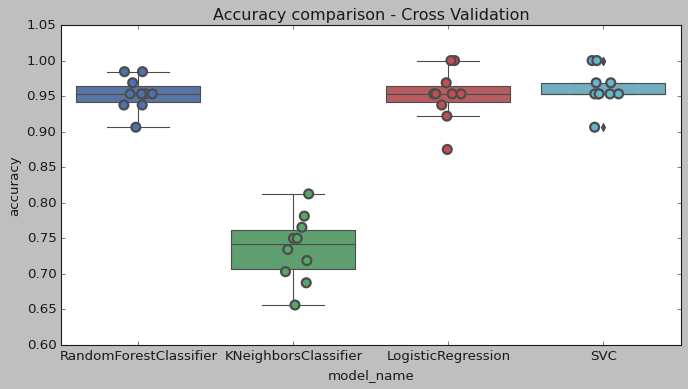

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='model_name', y='accuracy', data=cv_df).set_title("Accuracy comparison - Cross Validation")
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [215]:
acc_rf = metrics.accuracy_score(y_test,y_pred_randforest)
f1_score_rf = metrics.f1_score(y_test, y_pred_randforest,average=None)

In [216]:
result.loc[5]= ['RandomForestClassifier',acc_rf,f1_score_rf,'Accuracy is good']

#Voting Classifier

In [217]:
class4sample = data[data['ylabeled']== 4].sample(30,random_state=5,replace=True)
class0sample = data[data['ylabeled']== 0].sample(30,random_state=5,replace=True)
class1 = data[data['ylabeled']==1].sample(30,random_state=5,replace=True)
class2 = data[data['ylabeled']==2].sample(30,random_state=5,replace=True)
class3 = data[data['ylabeled']==3].sample(30,random_state=5,replace=True)

In [218]:
golden_test_set = pd.concat([class4sample,class0sample,class1,class2,class3],axis=0)

In [219]:
golden_test_set.shape

(150, 10)

In [220]:
x_new_gts= golden_test_set.Description
print(x_new_gts.shape)

(150,)


In [221]:
max_words = 6000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_new_gts.values.astype('U'))
sequences = tok.texts_to_sequences(x_new_gts.values.astype('U'))
sequences_matrix_gts= sequence.pad_sequences(sequences,maxlen=max_len)


print(sequences_matrix_gts[0])

[  1 297   2   1  42   3   1  49 298  10 299   1  42 115   1  14   8   5
  11   1  15  40 170   3   1  20  40   2   1  37  84   1  35   4   1  14
  33   3 300   8  86   5  64 301 149   3  57 302 228   4  10  39 150  39
 303   8   1  14   5  25  65  39 304   8  17  45 305  73   1 229  39  15
   1 306   3 230  22 151  99   1 152 307 308   4   1 100 309 193 171  87
  57   1 310   2   1  55   1  28 311 312]


In [222]:
y_new_gts=golden_test_set.ylabeled
print(y_new_gts)

247    4
212    4
69     4
242    4
23     4
      ..
5      3
136    3
174    3
181    3
255    3
Name: ylabeled, Length: 150, dtype: int64


In [223]:
from sklearn.ensemble import VotingClassifier

In [224]:
voting_classifier= VotingClassifier(estimators=[ ('lr', logreg),('SVC',svcclassifier),('KNN',knn),('DT',classifier),('rf', rand_classifer), ('mnb', nb)],voting='hard', weights=None,)
voting_classifier.fit(sequences_matrix, y_train)
pred_voting_classifier = voting_classifier.predict(sequences_matrix_gts)

In [225]:
print("VotingClassifier ACCURACY:",metrics.accuracy_score(y_new_gts,pred_voting_classifier))
print('VotingClassifier CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_new_gts,pred_voting_classifier))
print("===> **VotingClassifier F1 SCORE",metrics.f1_score(y_new_gts, pred_voting_classifier,average=None))
print("===> **VotingClassifier Recall SCORE",metrics.recall_score(y_new_gts, pred_voting_classifier,average=None))
print("===> **VotingClassifier Precision SCORE",metrics.precision_score(y_new_gts, pred_voting_classifier,average=None))


VotingClassifier ACCURACY: 0.8866666666666667
VotingClassifier CLASSIFIER CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         27   0   3   0   0
1          8  20   2   0   0
2          0   0  30   0   0
3          2   0   2  26   0
4          0   0   0   0  30
===> **VotingClassifier F1 SCORE [0.80597015 0.8        0.89552239 0.92857143 1.        ]
===> **VotingClassifier Recall SCORE [0.9        0.66666667 1.         0.86666667 1.        ]
===> **VotingClassifier Precision SCORE [0.72972973 1.         0.81081081 1.         1.        ]


In [226]:
acc_vc = metrics.accuracy_score(y_new_gts,pred_voting_classifier)
f1_score_vc = metrics.f1_score(y_new_gts, pred_voting_classifier,average=None)

In [227]:
result.loc[6]= ['VotingClassifier hard voting',acc_vc,f1_score_vc,'Accuracy is not good']

In [228]:
voting_classifier= VotingClassifier(estimators=[ ('lr', logreg),('SVC',svcclassifier),('KNN',knn),('DT',classifier),('rf', rand_classifer), ('mnb', nb)],voting='soft', weights=None,)
voting_classifier.fit(sequences_matrix, y_train)
pred_voting_classifier = voting_classifier.predict(sequences_matrix_gts)

In [229]:
print("VotingClassifier ACCURACY:",metrics.accuracy_score(y_new_gts,pred_voting_classifier))
print('VotingClassifier  CONFUSTION MATRIX:',pd.crosstab(y_new_gts,pred_voting_classifier))
print("===> **VotingClassifier F1 SCORE",metrics.f1_score(y_new_gts, pred_voting_classifier,average=None))
print("===> **VotingClassifier Recall SCORE",metrics.recall_score(y_new_gts, pred_voting_classifier,average=None))
print("===> **VotingClassifier Precision SCORE",metrics.precision_score(y_new_gts, pred_voting_classifier,average=None))

VotingClassifier ACCURACY: 0.8733333333333333
VotingClassifier  CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         26   1   3   0   0
1          8  20   2   0   0
2          0   0  30   0   0
3          5   0   0  25   0
4          0   0   0   0  30
===> **VotingClassifier F1 SCORE [0.75362319 0.78431373 0.92307692 0.90909091 1.        ]
===> **VotingClassifier Recall SCORE [0.86666667 0.66666667 1.         0.83333333 1.        ]
===> **VotingClassifier Precision SCORE [0.66666667 0.95238095 0.85714286 1.         1.        ]


In [230]:
acc_vc_soft = metrics.accuracy_score(y_new_gts,pred_voting_classifier)
f1_score_vc_soft = metrics.f1_score(y_new_gts, pred_voting_classifier,average=None)

In [231]:
result.loc[7]= ['VotingClassifier soft voting',acc_vc_soft,f1_score_vc_soft,'Accuracy is not too good']

In [232]:
result

model  Test Accuracy  \
0                 Logistic Regression       0.943750   
1                      KNN Classifier       0.931250   
2                      SVC Classifier       0.956250   
3  Multinominal Naive bais Classifier       0.700000   
4              DecisionTreeClassifier       0.787500   
5              RandomForestClassifier       0.962500   
6        VotingClassifier hard voting       0.886667   
7        VotingClassifier soft voting       0.873333   

                                            F1_score  \
0  [0.961038961038961, 0.7894736842105262, 0.9879...   
1  [0.9189189189189189, 0.8648648648648648, 0.987...   
2  [0.975, 0.8333333333333333, 0.9761904761904763...   
3  [0.55, 0.5333333333333333, 0.6857142857142856,...   
4  [0.7160493827160495, 0.3, 0.8372093023255814, ...   
5  [0.975609756097561, 0.8333333333333333, 1.0, 0...   
6  [0.8059701492537312, 0.8, 0.8955223880597014, ...   
7  [0.7536231884057971, 0.7843137254901961, 0.923...   

                                            Comments  
0  Accuracy is good,f1 score for all classes are ...  
1        Accuracy is 80, class3 f1 score is too less  
2                                   Accuracy is good  
3                                   Accuracy is poor  
4                                   Accuracy is poor  
5                                   Accuracy is good  
6                               Accuracy is not good  
7                           Accuracy is not too good

#Vanilla Neural Network With New Dataset

In [233]:
vanilla_model = Sequential()
vanilla_model.add(Embedding(5000, 128, input_length=max_len)) #vOCABSIZE IS 5000
vanilla_model.add(BatchNormalization())
vanilla_model.add(Flatten())
vanilla_model.add(Dense(500, activation='relu'))
vanilla_model.add(BatchNormalization())
vanilla_model.add(Dense(250, activation='relu'))
vanilla_model.add(BatchNormalization())
vanilla_model.add(Dropout(0.4))
vanilla_model.add(Dense(125, activation='relu'))
vanilla_model.add(BatchNormalization())
vanilla_model.add(Dropout(0.3))
vanilla_model.add(Dense(60, activation='relu'))
vanilla_model.add(BatchNormalization())
vanilla_model.add(Dropout(0.3))
vanilla_model.add(Dense(5, activation='softmax'))
vanilla_model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [234]:
vanilla_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          640000    
                                                                 
 batch_normalization_2 (Batc  (None, 100, 128)         512       
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 dense_5 (Dense)             (None, 500)               6400500   
                                                                 
 batch_normalization_3 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 250)              

In [235]:
print(y_train.shape)
print(sequences_matrix.shape)

(640,)
(640, 100)


In [236]:
NN_Model = vanilla_model.fit(sequences_matrix, y_train_enc, batch_size=8, epochs=50,validation_split=0.15,verbose=2)

Epoch 1/50
68/68 - 3s - loss: 1.9446 - accuracy: 0.3327 - val_loss: 1.5538 - val_accuracy: 0.3125 - 3s/epoch - 48ms/step
Epoch 2/50
68/68 - 2s - loss: 1.5616 - accuracy: 0.4265 - val_loss: 1.5282 - val_accuracy: 0.3125 - 2s/epoch - 29ms/step
Epoch 3/50
68/68 - 2s - loss: 1.2751 - accuracy: 0.5147 - val_loss: 1.5344 - val_accuracy: 0.3125 - 2s/epoch - 30ms/step
Epoch 4/50
68/68 - 2s - loss: 1.2715 - accuracy: 0.5184 - val_loss: 1.4868 - val_accuracy: 0.3958 - 2s/epoch - 29ms/step
Epoch 5/50
68/68 - 2s - loss: 1.1592 - accuracy: 0.5772 - val_loss: 1.3693 - val_accuracy: 0.4479 - 2s/epoch - 29ms/step
Epoch 6/50
68/68 - 2s - loss: 1.0611 - accuracy: 0.6029 - val_loss: 1.1984 - val_accuracy: 0.5104 - 2s/epoch - 29ms/step
Epoch 7/50
68/68 - 2s - loss: 1.0539 - accuracy: 0.6029 - val_loss: 0.9776 - val_accuracy: 0.5625 - 2s/epoch - 29ms/step
Epoch 8/50
68/68 - 2s - loss: 0.9570 - accuracy: 0.6489 - val_loss: 0.7354 - val_accuracy: 0.6979 - 2s/epoch - 29ms/step
Epoch 9/50
68/68 - 2s - loss: 0.

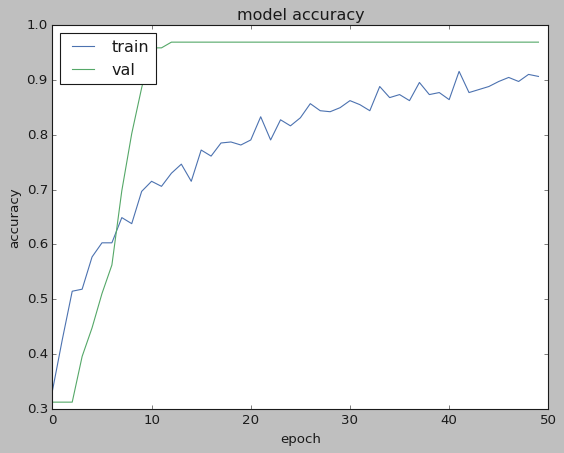

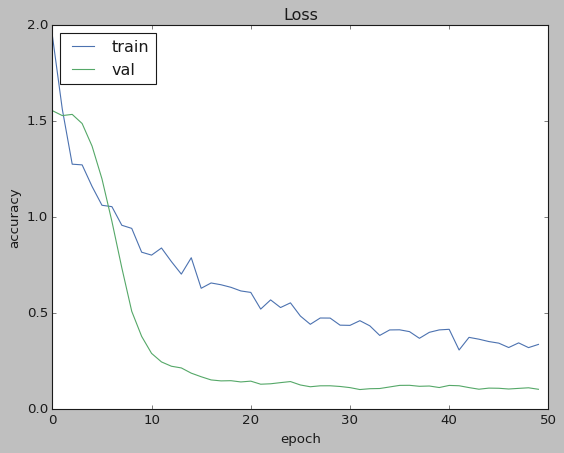

In [237]:
plt.plot(NN_Model.history['accuracy'])
plt.plot(NN_Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(NN_Model.history['loss'])
plt.plot(NN_Model.history['val_loss'])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [238]:
predict_x=vanilla_model.predict(sequences_matrix_test) 
pred_NN=np.argmax(predict_x,axis=1)

In [239]:
pred_NN = pd.DataFrame(pred_NN,columns=['pred'])

In [240]:
pred_NN.pred

0      4
1      2
2      4
3      3
4      0
      ..
155    0
156    3
157    3
158    2
159    4
Name: pred, Length: 160, dtype: int64

In [241]:
print(metrics.confusion_matrix(y_test,pred_NN.pred))
metrics.recall_score(y_test,pred_NN.pred,average=None)

[[40  0  0  0  0]
 [ 2 15  0  0  0]
 [ 0  0 41  0  0]
 [ 0  4  0 22  0]
 [ 0  0  0  0 36]]


array([1.        , 0.88235294, 1.        , 0.84615385, 1.        ])

In [242]:
print("vanilla_model ACCURACY:",metrics.accuracy_score(y_test,pred_NN.pred))
print("===> **vanilla_model F1 SCORE",metrics.f1_score(y_test, pred_NN.pred,average=None))
print("===> **vanilla_model Recall SCORE",metrics.recall_score(y_test, pred_NN.pred,average=None))
print("===> **vanilla_model Precision SCORE",metrics.precision_score(y_test, pred_NN.pred,average=None))

vanilla_model ACCURACY: 0.9625
===> **vanilla_model F1 SCORE [0.97560976 0.83333333 1.         0.91666667 1.        ]
===> **vanilla_model Recall SCORE [1.         0.88235294 1.         0.84615385 1.        ]
===> **vanilla_model Precision SCORE [0.95238095 0.78947368 1.         1.         1.        ]


In [243]:
Vanila_network_acc = metrics.accuracy_score(y_test,pred_NN.pred)
vanila_network_f1score = metrics.f1_score(y_test, pred_NN.pred,average=None)

In [244]:
result.loc[8]= ['Vanila Neural Network',Vanila_network_acc,vanila_network_f1score,'Accuracy is good']

#Bi Directional lstm Model With New Dataset

In [245]:
lstm_model_2= Sequential()
lstm_model_2.add(tf.keras.layers.Input(shape=(None,)))
lstm_model_2.add(tf.keras.layers.Embedding(5000, 100, mask_zero=True))
lstm_model_2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_state=False,recurrent_dropout=0.1)))
lstm_model_2.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
lstm_model_2.add(tf.keras.layers.Dense(5, activation=tf.keras.activations.softmax))

lstm_model_2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [246]:
lstm_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         500000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 5)                 505       
                                                                 
Total params: 681,405
Trainable params: 681,405
Non-trainable params: 0
_________________________________________________________________


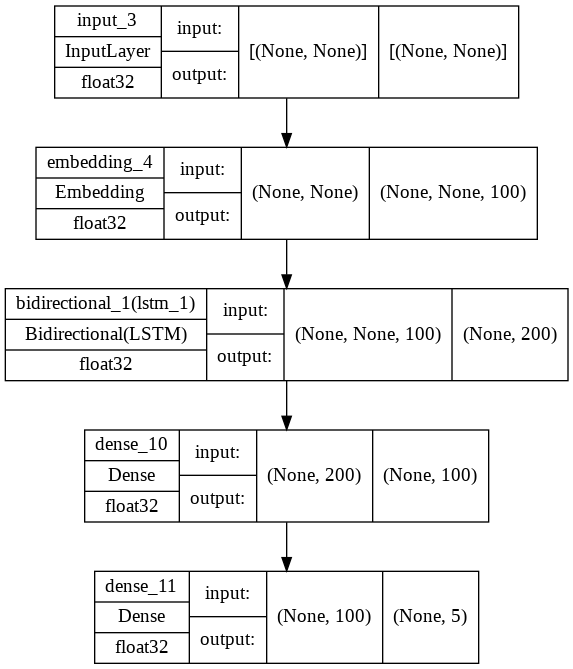

In [247]:
from keras.utils.vis_utils import plot_model
plot_model(lstm_model_2, to_file='model_plot1.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [248]:
LSTM_Model_2 = lstm_model_2.fit(sequences_matrix, y_train_enc, batch_size=8, epochs=30,validation_split=0.15,verbose=2)

Epoch 1/30
68/68 - 17s - loss: 1.3038 - accuracy: 0.4430 - val_loss: 0.8188 - val_accuracy: 0.5312 - 17s/epoch - 248ms/step
Epoch 2/30
68/68 - 13s - loss: 0.5175 - accuracy: 0.7960 - val_loss: 0.2656 - val_accuracy: 0.8750 - 13s/epoch - 191ms/step
Epoch 3/30
68/68 - 13s - loss: 0.1843 - accuracy: 0.9430 - val_loss: 0.1344 - val_accuracy: 0.9688 - 13s/epoch - 195ms/step
Epoch 4/30
68/68 - 13s - loss: 0.0578 - accuracy: 0.9871 - val_loss: 0.1309 - val_accuracy: 0.9583 - 13s/epoch - 189ms/step
Epoch 5/30
68/68 - 13s - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.1502 - val_accuracy: 0.9583 - 13s/epoch - 190ms/step
Epoch 6/30
68/68 - 14s - loss: 0.0328 - accuracy: 0.9963 - val_loss: 0.0917 - val_accuracy: 0.9583 - 14s/epoch - 209ms/step
Epoch 7/30
68/68 - 13s - loss: 0.0456 - accuracy: 0.9890 - val_loss: 0.1460 - val_accuracy: 0.9583 - 13s/epoch - 189ms/step
Epoch 8/30
68/68 - 13s - loss: 0.0192 - accuracy: 0.9963 - val_loss: 0.1221 - val_accuracy: 0.9583 - 13s/epoch - 191ms/step
Epoch 9/

In [249]:
pred_LSTM_ = lstm_model_2.predict(sequences_matrix_test)
pred_LSTM=np.argmax(pred_LSTM_,axis=1)


In [250]:
pred_LSTM_2 = pd.DataFrame(pred_LSTM,columns=['pred'])
pred_LSTM_2

pred
0       4
1       2
2       4
3       3
4       0
..    ...
155     0
156     3
157     3
158     2
159     4

[160 rows x 1 columns]

In [251]:
print(metrics.confusion_matrix(y_test,pred_LSTM_2.pred))
print(metrics.f1_score(y_test,pred_NN.pred,average=None))
print(metrics.recall_score(y_test,pred_NN.pred,average=None))

[[36  0  1  3  0]
 [ 0 16  1  0  0]
 [ 0  0 41  0  0]
 [ 0  4  0 22  0]
 [ 0  0  0  0 36]]
[0.97560976 0.83333333 1.         0.91666667 1.        ]
[1.         0.88235294 1.         0.84615385 1.        ]


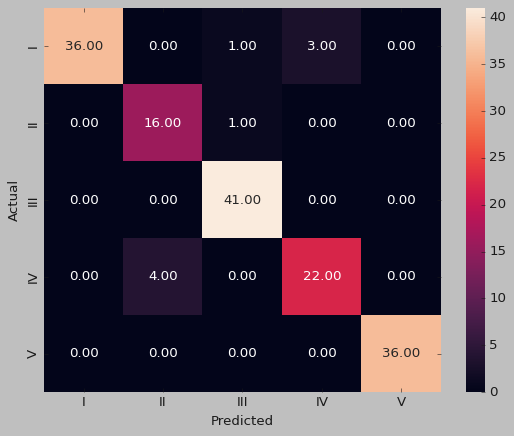

In [252]:
sns.heatmap(metrics.confusion_matrix(y_test,pred_LSTM_2.pred), annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [253]:
print("Bidirectional lstm_model ACCURACY:",metrics.accuracy_score(y_test,pred_LSTM_2.pred))
print("===> **Bidirectional lstm_model ACCURACY F1 SCORE",metrics.f1_score(y_test, pred_LSTM_2.pred,average=None))
print("===> **Bidirectional lstm_model ACCURACY Recall SCORE",metrics.recall_score(y_test, pred_LSTM_2.pred,average=None))
print("===> **Bidirectional lstm_model ACCURACY Precision SCORE",metrics.precision_score(y_test, pred_LSTM_2.pred,average=None))

Bidirectional lstm_model ACCURACY: 0.94375
===> **Bidirectional lstm_model ACCURACY F1 SCORE [0.94736842 0.86486486 0.97619048 0.8627451  1.        ]
===> **Bidirectional lstm_model ACCURACY Recall SCORE [0.9        0.94117647 1.         0.84615385 1.        ]
===> **Bidirectional lstm_model ACCURACY Precision SCORE [1.         0.8        0.95348837 0.88       1.        ]


In [254]:
bilstm_acc = metrics.accuracy_score(y_test,pred_LSTM_2.pred)
bilstm_f1score = metrics.f1_score(y_test, pred_LSTM_2.pred,average=None)                          

In [255]:
result.loc[9]= ['Bi directional Neural Network',bilstm_acc,bilstm_f1score,'Accuracy and f1 score is good']

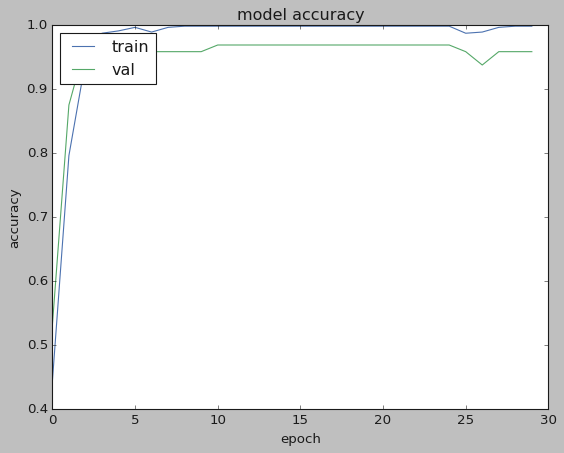

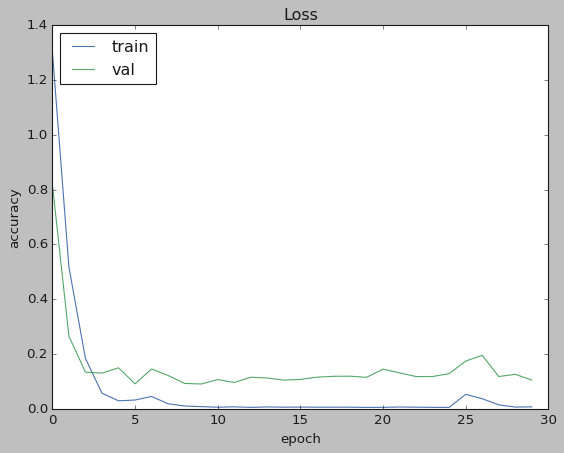

In [256]:
plt.plot(LSTM_Model_2.history['accuracy'])
plt.plot(LSTM_Model_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(LSTM_Model_2.history['loss'])
plt.plot(LSTM_Model_2.history['val_loss'])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Results

In [257]:
result

model  Test Accuracy  \
0                 Logistic Regression       0.943750   
1                      KNN Classifier       0.931250   
2                      SVC Classifier       0.956250   
3  Multinominal Naive bais Classifier       0.700000   
4              DecisionTreeClassifier       0.787500   
5              RandomForestClassifier       0.962500   
6        VotingClassifier hard voting       0.886667   
7        VotingClassifier soft voting       0.873333   
8               Vanila Neural Network       0.962500   
9       Bi directional Neural Network       0.943750   

                                            F1_score  \
0  [0.961038961038961, 0.7894736842105262, 0.9879...   
1  [0.9189189189189189, 0.8648648648648648, 0.987...   
2  [0.975, 0.8333333333333333, 0.9761904761904763...   
3  [0.55, 0.5333333333333333, 0.6857142857142856,...   
4  [0.7160493827160495, 0.3, 0.8372093023255814, ...   
5  [0.975609756097561, 0.8333333333333333, 1.0, 0...   
6  [0.8059701492537312, 0.8, 0.8955223880597014, ...   
7  [0.7536231884057971, 0.7843137254901961, 0.923...   
8  [0.975609756097561, 0.8333333333333333, 1.0, 0...   
9  [0.9473684210526316, 0.8648648648648648, 0.976...   

                                            Comments  
0  Accuracy is good,f1 score for all classes are ...  
1        Accuracy is 80, class3 f1 score is too less  
2                                   Accuracy is good  
3                                   Accuracy is poor  
4                                   Accuracy is poor  
5                                   Accuracy is good  
6                               Accuracy is not good  
7                           Accuracy is not too good  
8                                   Accuracy is good  
9                      Accuracy and f1 score is good

After analyzing all the Machine learning and deep learning model evaluation matrics by considering accuracy and f1 score, finalized the Bidirectional LSTM model is good without overfitting test results and with fewer modulations in the loss.

We have analysed accuracy, f1 score, recall and precision. After analysing all the Machine learning and deep learning models evaluation metrics and by considering accuracy and f1 score, we have finalised the Bidirectional LSTM model and also it is not as overfitted when compared to the other model and it has less modulations in the loss. 

The fi score of bidirectional is better than other models. 
In the future we might get noisy data with variant lengths of data, here RNN is more tolerant than any of the other models like random classifier and logistic regression. 

LSTM networks are a type of RNN that uses special units in addition to standard units. LSTM units include a 'memory cell' that can maintain information in memory for long periods of time. This memory cell lets them learn longer-term dependencies. Hence we are using LSTM for the above scenario as it provide long term robust solution.

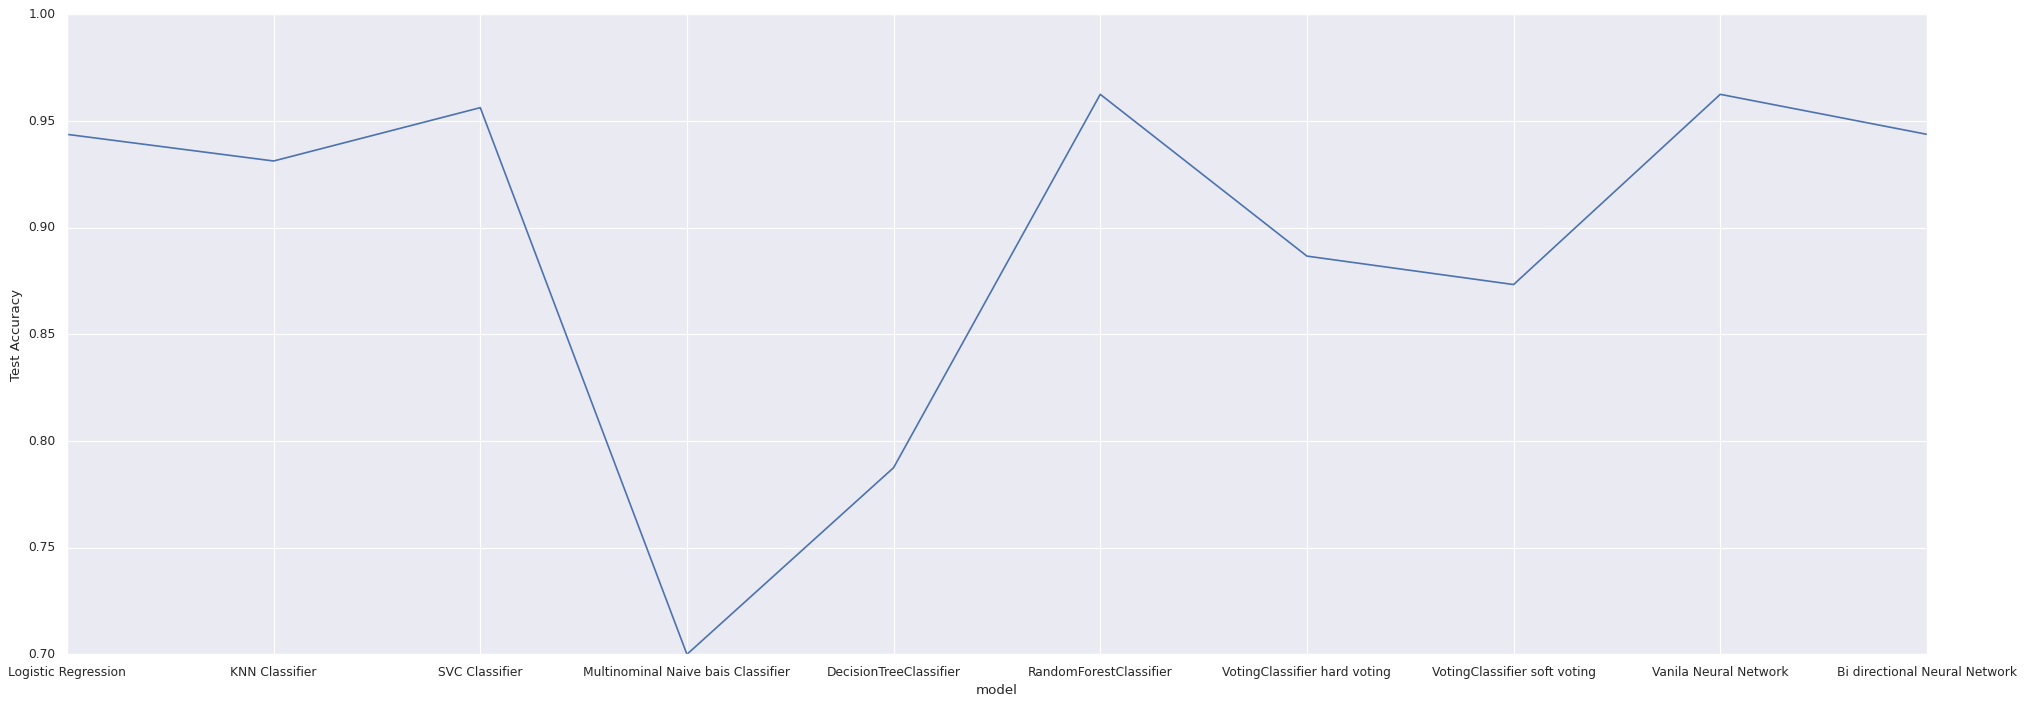

In [258]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(30,10)})
sns.lineplot(x="model", dashes=False, y="Test Accuracy", data=result)
plt.show()

# 3.Milestone 3: [ Duration: 2 weeks, Score: 20 points]

  * ‣Input: Pickled model from milestone 2

  * ‣Process:

        ‣Step 1: Design a clickable UI which can automate tasks performed under milestone 1 [ 5 points ]

        ‣Step 2: Design a clickable UI which can automate tasks performed under milestone 2 [ 5 points ]

        ‣Step 3: Design a clickable UI based chatbot interface [ 5 points ]

  * ‣Output: Clickable UI based chatbot interface which accepts text as input and replies back with relevant answers.

  * ‣Submission: Final report [ 5 points 

In [259]:
# serialize model to JSON
model_json = lstm_model_2.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
lstm_model_2.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
lstm_model_2.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


# Front end 

    We have built a GUI for the process which can be run with executing the python script. 
    We have added below functionalities for the GUI : 
      1 : Model Summary : Option 1 will be showing the summary on model
      2 : Retrain model : 
      Option 2 will be retraining the model. 
      We need to provide the file path along with name  also to train the model
      3 : Predict : Option 3 will be used to predict the accident level depending on description provided
      4 : Pre processing and EDA : 
      Option 4 will be preprocessing and performing EDA
      We need to provide the file path along with name  also to perform preprocessing on dataset.

# Model Building
    Understanding each and every component in the data set, it helps to recognize and identify patterns in it.
    We must be more careful when we are dealing with Imbalanced classification data, it has a chance to overfit the results.
    Data Preprocessing, this step plays an important role in improving the accuracy. Different vectoring techniques give different results.
    Removing special characters, numeric numbers and stop words, this cleaned data gives rich information to the model.
    While changing the text into vector space of matrix, fitting the train and test data separately reduces the overfitting and helps increase the accuracy.
    Applying data augmentation may help when we have less records, but in this case, we have an overfitting issue.
    Downsampling/Upsampling of some accident levels helps us to deal with this class imbalanced dataset.
    It's a Multiclass classification problem. Initially we have seen overfitting results due to imbalanced multiclass classification problems.
    After adding regularisation and dropout layers into Neural networks we have not seen any overfitting results in results.
    Bi-directional LSTM model gave the best results, as it has reverse flow of information
    Good to tune the model with different Loss, Optimization and batch sizes.
    In the Evaluation matrix we have considered accuracy, F1 score mainly, always trying to reduce the false positives.
    Visualisation helps to identify the oscillations, variations in the model at all the batches.


## Suggestions

*	We have less number of observations to analyse the cause of accidents correctly and rather we should collect more number of observations to get better results.
*	Less number of features available in dataset.
*	Lack of access to quality data.

*	Once we deploy the finalised model in production, we might get less f1-score as compared to productionalized model results.

*	Since we are predicting the accident level, we need to be 100% sure or at least close to 100% so that we can prevent the lot of accidents in industry.

*	In this project, we discovered that the main causes of accidents are mistakes in hand-operation and time-related factor.

*	To reduce the occurrences of accidents, more stringent safety standards in hand-operation will be needed in period when many accidents occur.

*	We realized that the detail information of accidents like 'Description' is so useful to analyze the cause.

*	With more detailed information such as machining data (ex. CNC, Current, Voltage) in plants, weather information, employee's personal data (ex. age, experience in the industry sector, work performance ), we can clarify the cause of accidents more correctly.

*	With more number of observations than current number of records = 425 so that we can feed more data into ML/ANN/NLP models to train, evaluate the performance of those models and get the better results.

*	There are quite a lot of critical risk descriptions, but with the help of SME we can decide whether this column has outliers or not and also SME can help us in understanding the data better.


==================================================================================================================
# END
==================================================================================================================